In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re

# Set max_columns to None to always display all columns
pd.set_option('display.max_columns', None)

## Data Checks

In [51]:
# Base path to the folders containing city files
base_path = "../results/output"

# Updated city details with OSMID and target date
city_details = {
    # "Stockholm": {"osmid": "398021", "date": "2024-06-20"},
    # "Amsterdam": {"osmid": "271110", "date": "2024-06-20"},
    # "Boston": {"osmid": "2315704", "date": "2024-06-20"},
    # "Cambridge": {"osmid": "1933745", "date": "2024-06-20"},
    # "Tunis": {"osmid": "8896976", "date": "2024-06-20"},
    # "Hong Kong": {"osmid": "913110", "date": "2025-06-20"},
    # "Singapore": {"osmid": "536780", "date": "2024-03-20"},
    # "Belem": {"osmid": "185567", "date": "2025-03-20"},
    # "Rio": {"osmid": "2697338", "date": "2025-12-21"},
    # "Cape Town": {"osmid": "79604", "date": "2025-12-21"},
    "Sydney": {"osmid": "1251066", "date": "2025-12-21"},
}

# Process data for each city
for city, details in city_details.items():
    print(f"Processing city: {city} ({details['osmid']})...")
    osmid = details["osmid"]
    target_date = details["date"]

    # Construct the file path
    file_path = f"{base_path}/{osmid}/{osmid}_sidewalks_with_stats_multiple_dates.gpkg"

    try:
        # Load city data
        city_data = gpd.read_file(file_path, engine='pyogrio')
        print(f"Loaded data for {city}. Columns: {list(city_data.columns)[:5]}...")

        # Extract columns matching the target date
        date_str = target_date.replace("-", "")
        column_pattern = rf"{date_str}_(building|tree)_shade_percent_at_(\d+)"
        matched_columns = [col for col in city_data.columns if re.match(column_pattern, col)]
        
        if not matched_columns:
            print(f"No timestamp data columns for {city} on {target_date}. Skipping...")
            continue

        # Check if all rows have data in the matched columns
        missing_data_report = {}
        for col in matched_columns:
            missing_count = city_data[col].isna().sum()
            missing_data_report[col] = missing_count

        if any(missing_data_report.values()):
            print(f"Missing data detected for {city} on {target_date}:")
            for col, missing_count in missing_data_report.items():
                if missing_count > 0:
                    print(f"  - Column '{col}' has {missing_count} missing values out of {len(city_data)} rows.")
        else:
            print(f"All rows have data in the timestamp columns for {city} on {target_date}.")

        print(f"Completed processing for {city}.\n")
    except FileNotFoundError:
        print(f"File not found for {city} at {file_path}. Skipping...\n")
    except Exception as e:
        print(f"An error occurred while processing {city}: {e}\n")

Processing city: Sydney (1251066)...
Loaded data for Sydney. Columns: ['allowed_turns', 'direction', 'index', 'layer', 'muv']...
Missing data detected for Sydney on 2025-12-21:
  - Column '20251221_building_shade_percent_at_0600' has 8254 missing values out of 27723 rows.
  - Column '20251221_building_shade_percent_at_0630' has 8254 missing values out of 27723 rows.
  - Column '20251221_building_shade_percent_at_0700' has 8254 missing values out of 27723 rows.
  - Column '20251221_building_shade_percent_at_0730' has 8254 missing values out of 27723 rows.
  - Column '20251221_building_shade_percent_at_0800' has 8254 missing values out of 27723 rows.
  - Column '20251221_building_shade_percent_at_0830' has 8254 missing values out of 27723 rows.
  - Column '20251221_building_shade_percent_at_0900' has 8254 missing values out of 27723 rows.
  - Column '20251221_building_shade_percent_at_0930' has 8254 missing values out of 27723 rows.
  - Column '20251221_building_shade_percent_at_1000' ha

In [52]:
city_data.head()

allowed_turns direction  index  layer  \
0           [ ]   Forward      0      0   
1           [ ]  Backward      5      0   
2           [ ]   Forward      0      0   
3           [ ]  Backward      5      0   
4           [ ]   Forward      0      0   

                                                 muv  road  \
0  {'electrifications': [], 'is_sidepath': True, ...    20   
1  {'electrifications': [], 'is_sidepath': True, ...    20   
2  {'electrifications': [], 'is_sidepath': True, ...    21   
3  {'electrifications': [], 'is_sidepath': True, ...    21   
4  {'electrifications': [], 'is_sidepath': True, ...    22   

           speed_limit      type  width  20251221_building_mean  \
0  Some(Speed(2.7778))  Sidewalk    1.5                0.946103   
1  Some(Speed(2.7778))  Sidewalk    1.5                0.924606   
2  Some(Speed(2.7778))  Sidewalk    1.5                0.954628   
3  Some(Speed(2.7778))  Sidewalk    1.5                0.958061   
4  Some(Speed(2.7778))  Sidewalk    1.5                0.978161   

   20251221_building_std  20251221_building_min  20251221_building_max  \
0               0.040638               0.689655               1.000000   
1               0.060054               0.655172               1.000000   
2               0.016029               0.931035               0.965517   
3               0.014195               0.931035               0.965517   
4               0.028827               0.896552               1.000000   

   20251221_building_shade_percent_at_0600  \
0                                63.025210   
1                                61.016949   
2                                31.578947   
3                                21.621622   
4                                20.000000   

   20251221_building_shade_percent_at_0630  \
0                                 3.361345   
1                                43.220339   
2                                 0.000000   
3                                 0.000000   
4                                 3.333333   

   20251221_building_shade_percent_at_0700  \
0                                 3.361345   
1                                20.338983   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   20251221_building_shade_percent_at_0730  \
0                                 2.521008   
1                                11.016949   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   20251221_building_shade_percent_at_0800  \
0                                 3.361345   
1                                 5.084746   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   20251221_building_shade_percent_at_0830  \
0                                 1.680672   
1                                 2.542373   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   20251221_building_shade_percent_at_0900  \
0                                 1.680672   
1                                 2.542373   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   20251221_building_shade_percent_at_0930  \
0                                 0.840336   
1                                 1.694915   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   20251221_building_shade_percent_at_1000  \
0                                 0.000000   
1                                 0.847458   
2                                 0.000000   
3                                 0.000000   
4                                 0.000000   

   20251221_building_shade_pe

In [53]:
city_data.columns

Index(['allowed_turns', 'direction', 'index', 'layer', 'muv', 'road',
       'speed_limit', 'type', 'width', '20251221_building_mean',
       '20251221_building_std', '20251221_building_min',
       '20251221_building_max', '20251221_building_shade_percent_at_0600',
       '20251221_building_shade_percent_at_0630',
       '20251221_building_shade_percent_at_0700',
       '20251221_building_shade_percent_at_0730',
       '20251221_building_shade_percent_at_0800',
       '20251221_building_shade_percent_at_0830',
       '20251221_building_shade_percent_at_0900',
       '20251221_building_shade_percent_at_0930',
       '20251221_building_shade_percent_at_1000',
       '20251221_building_shade_percent_at_1030',
       '20251221_building_shade_percent_at_1100',
       '20251221_building_shade_percent_at_1130',
       '20251221_building_shade_percent_at_1200',
       '20251221_building_shade_percent_at_1230',
       '20251221_building_shade_percent_at_1300',
       '20251221_building_shade_p

In [ ]:
city_data.explore(
    column='20251221_tree_shade_percent_at_1130',
    tiles='OpenStreetMap'
)

In [ ]:
city_data.plot(figsize=(25,25), column='20251221_tree_mean', legend=True)

In [ ]:
city_data.plot(figsize=(25,25), column='20251221_tree_shade_percent_at_1200', legend=True)

In [ ]:
city_data.plot(figsize=(25,25), column='20251221_tree_shade_percent_at_0930', legend=True)

In [ ]:
city_data.plot(figsize=(25,25), column='20251221_tree_shade_percent_at_0930', legend=True)

In [22]:
city_data.dtypes

allowed_turns                            object
direction                                object
index                                     int64
layer                                     int64
muv                                      object
road                                      int64
speed_limit                              object
type                                     object
width                                   float64
20251221_building_mean                  float64
20251221_building_std                   float64
20251221_building_min                   float64
20251221_building_max                   float64
20251221_tree_mean                      float64
20251221_tree_std                       float64
20251221_tree_min                       float64
20251221_tree_max                       float64
20251221_tree_shade_percent_at_1200       int64
20251221_tree_shade_percent_at_1230       int64
geometry                               geometry
dtype: object

In [41]:
city_data.describe()

index         layer          road         width  \
count  27723.000000  27723.000000  27723.000000  27723.000000   
mean       1.342099     -0.047794   3310.750857      1.739119   
std        2.319087      0.424677   2664.682891      0.705008   
min        0.000000     -5.000000      0.000000      0.300000   
25%        0.000000      0.000000   1121.000000      1.500000   
50%        0.000000      0.000000   2587.000000      1.500000   
75%        4.000000      0.000000   4997.500000      2.000000   
max       12.000000      3.000000   9843.000000     34.000000   

       20251221_building_mean  20251221_building_std  20251221_building_min  \
count            19469.000000           19469.000000           19469.000000   
mean                 0.632034               0.071234               0.466646   
std                  0.184174               0.057920               0.240272   
min                  0.031348               0.000000               0.000000   
25%                  0.510364               0.024568               0.275862   
50%                  0.650039               0.056530               0.448276   
75%                  0.775235               0.105201               0.655172   
max                  1.000000               0.386728               1.000000   

       20251221_building_max  20251221_building_shade_percent_at_0600  \
count           19469.000000                                      0.0   
mean                0.764294                                      NaN   
std                 0.169639                                      NaN   
min                 0.034483                                      NaN   
25%                 0.689655                                      NaN   
50%                 0.793103                                      NaN   
75%                 0.896552                                      NaN   
max                 1.000000                                      NaN   

       20251221_building_shade_percent_at_0630  \
count                                      0.0   
mean                                       NaN   
std                                        NaN   
min                                        NaN   
25%                                        NaN   
50%                                        NaN   
75%                                        NaN   
max                                        NaN   

       20251221_building_shade_percent_at_0700  \
count                                      0.0   
mean                                       NaN   
std                                        NaN   
min                                        NaN   
25%                                        NaN   
50%                                        NaN   
75%                                        NaN   
max                                        NaN   

       20251221_building_shade_percent_at_0730  \
count                                      0.0   
mean                                       NaN   
std                                        NaN   
min                                        NaN   
25%                                        NaN   
50%                                        NaN   
75%                                        NaN   
max                                        NaN   

       20251221_building_shade_percent_at_0800  \
count                                      0.0   
mean                                       NaN   
std                                        NaN   
min                                        NaN   
25%                                        NaN   
50%                                        NaN   
75%                                        NaN   
max                                        NaN   

       20251221_building_shade_percent_at_0830  \
count                                      0.0   
mean                                       NaN   
std                                        NaN   
min                                        NaN   
25% 

array([[<Axes: title={'center': '20251221_tree_shade_percent_at_1200'}>]],
      dtype=object)

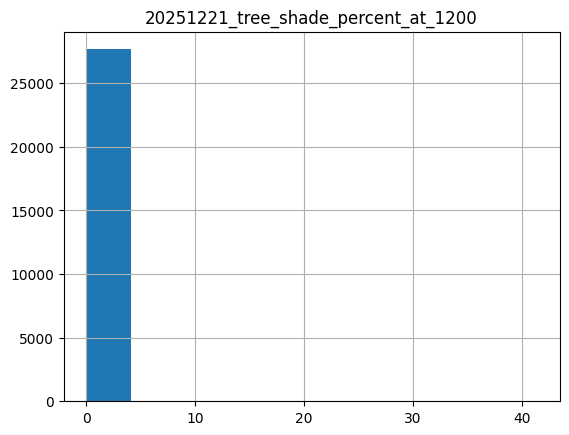

In [28]:
city_data.hist(column='20251221_tree_shade_percent_at_1200')

In [ ]:
# Base path to the folders containing city files
base_path = "../results/output"

# Process data for each city
for city, details in city_details.items():
    print(f"Processing city: {city} ({details['osmid']})...")
    osmid = details["osmid"]
    target_date = details["date"]

    # Construct the file path
    file_path = f"{base_path}/{osmid}/{osmid}_sidewalks_with_stats_multiple_dates.gpkg"

    try:
        # Load city data
        city_data = gpd.read_file(file_path, engine='pyogrio')
        print(f"Loaded data for {city}. Columns: {list(city_data.columns)[:5]}...")

        # Extract columns matching the target date
        date_str = target_date.replace("-", "")
        column_pattern = rf"{date_str}_(building|tree)_shade_percent_at_(\d+)"
        matched_columns = [col for col in city_data.columns if re.match(column_pattern, col)]
        
        if not matched_columns:
            print(f"No timestamp data columns for {city} on {target_date}. Skipping...")
            continue

        # Check if all rows have data in the matched columns
        missing_data_report = {}
        for col in matched_columns:
            missing_count = city_data[col].isna().sum()
            missing_data_report[col] = missing_count

            # Print the head of the column
            print(f"\nPreview of column '{col}':")
            print(city_data[col].head())

            # Plot histogram
            plt.figure(figsize=(8, 4))
            city_data[col].dropna().hist(bins=20, alpha=0.7)
            plt.title(f"Histogram of '{col}'")
            plt.xlabel("Value")
            plt.ylabel("Frequency")
            plt.grid(False)
            plt.show()

        if any(missing_data_report.values()):
            print(f"\nMissing data detected for {city} on {target_date}:")
            for col, missing_count in missing_data_report.items():
                if missing_count > 0:
                    print(f"  - Column '{col}' has {missing_count} missing values.")
        else:
            print(f"All rows have data in the timestamp columns for {city} on {target_date}.")

        print(f"Completed processing for {city}.\n")
    except FileNotFoundError:
        print(f"File not found for {city} at {file_path}. Skipping...\n")
    except Exception as e:
        print(f"An error occurred while processing {city}: {e}\n")

## Processing figures

#### Loading all cities separately

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re

# Updated city details with OSMID and target date
city_details = {
    "Stockholm": {"osmid": "398021", "date": "2024-06-20"},
    "Amsterdam": {"osmid": "271110", "date": "2024-06-20"},
    "Boston": {"osmid": "2315704", "date": "2024-06-20"},
    # "Cambridge": {"osmid": "1933745", "date": "2024-06-20"},
    "Tunis": {"osmid": "8896976", "date": "2024-06-20"},
    "Hong Kong": {"osmid": "913110", "date": "2025-06-20"},
    "Singapore": {"osmid": "536780", "date": "2024-03-20"},
    "Belem": {"osmid": "185567", "date": "2025-03-20"},
    "Rio": {"osmid": "2697338", "date": "2025-12-21"},
    "Cape Town": {"osmid": "79604", "date": "2024-12-21"},
    "Sydney": {"osmid": "1251066", "date": "2025-12-21"},
}

# Enable test run and visualization toggle
test_run = False
visualize = False
if test_run:
    city_details = {k: city_details[k] for k in list(city_details.keys())[:2]}

# Base path to the folders containing city files
base_path = "../results/output"

# Placeholder for processed data
building_shade = []
tree_shade = []
all_hours = range(48)  # 48 slots for 30-minute intervals (0:00 to 24:00)

# Process data for each city
for city, details in city_details.items():
    print(f"Processing city: {city} ({details['osmid']})...")
    osmid = details["osmid"]
    target_date = details["date"]

    # Construct the file path
    file_path = f"{base_path}/{osmid}/{osmid}_sidewalks_with_stats_multiple_dates.gpkg"

    try:
        # Load city data
        city_data = gpd.read_file(file_path, engine='pyogrio')
        print(f"Loaded data for {city}. Columns: {list(city_data.columns)[:5]}...")

        # Extract columns matching the target date
        date_str = target_date.replace("-", "")
        column_pattern = rf"{date_str}_(building|tree)_shade_percent_at_(\d+)"
        matched_columns = [col for col in city_data.columns if re.match(column_pattern, col)]
        
        if not matched_columns:
            print(f"No data columns for {city} on {target_date}. Skipping...")
            continue

        # Separate columns for building and tree
        building_columns = [col for col in matched_columns if "_building_" in col]
        tree_columns = [col for col in matched_columns if "_tree_" in col]

        # Extract available times
        time_pattern = rf"{date_str}_(building|tree)_shade_percent_at_(\d+)"
        building_times = [int(re.search(time_pattern, col).group(2)) for col in building_columns]
        tree_times = [int(re.search(time_pattern, col).group(2)) for col in tree_columns]

        # Normalize times to 30-minute intervals and sort
        sorted_building_columns = [col for _, col in sorted(zip(building_times, building_columns))]
        sorted_tree_columns = [col for _, col in sorted(zip(tree_times, tree_columns))]

        # Prepare arrays for full 24-hour coverage (48 slots for 30-minute intervals)
        building_full = np.full(len(all_hours), 100.0)  # Default to 100%
        tree_full = np.full(len(all_hours), 100.0)

        # Normalize times to 30-minute intervals
        def normalize_time_to_index(time):
            hour = time // 100
            minute = time % 100
            return hour * 2 + minute // 30

        building_indices = [normalize_time_to_index(t) for t in building_times]
        tree_indices = [normalize_time_to_index(t) for t in tree_times]

        # Prepare arrays for full 24-hour coverage (48 slots for 30-minute intervals)
        building_full = np.full(len(all_hours), 100.0)  # Default to 100%
        tree_full = np.full(len(all_hours), 100.0)

        # Fill with actual data
        for idx, col in zip(building_indices, sorted_building_columns):
            if idx < len(all_hours):  # Ensure index is within range
                building_full[idx] = city_data[col].mean()

        for idx, col in zip(tree_indices, sorted_tree_columns):
            if idx < len(all_hours):  # Ensure index is within range
                tree_full[idx] = city_data[col].mean()

        # Store results
        building_shade.append(building_full)
        tree_shade.append(tree_full)

        print(f"Completed processing for {city}.")
    except FileNotFoundError:
        print(f"File not found for {city} at {file_path}. Skipping...")
        continue

# Convert to DataFrame for labeling
city_names = list(city_details.keys())
building_shade_df = pd.DataFrame(building_shade, index=city_names, columns=[f"{h//2:02}:{h%2*30:02}" for h in all_hours])
tree_shade_df = pd.DataFrame(tree_shade, index=city_names, columns=[f"{h//2:02}:{h%2*30:02}" for h in all_hours])

# Print DataFrame preview
print("\nBuilding Shade DataFrame:")
print(building_shade_df.head())

print("\nTree Shade DataFrame:")
print(tree_shade_df.head())

# Plotting heatmaps if visualization is enabled
if visualize:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Building shade heatmap
    im1 = axes[0].imshow(building_shade_df, aspect='auto', cmap='YlGnBu', interpolation='nearest')
    axes[0].set_title("Building Shade Percentages Across Time")
    axes[0].set_yticks(range(len(city_details)))
    axes[0].set_yticklabels(building_shade_df.index)
    axes[0].set_xticks(range(0, len(all_hours), 6))
    axes[0].set_xticklabels(building_shade_df.columns[::6])
    axes[0].set_xlabel("Time of Day")
    axes[0].set_ylabel("City")
    fig.colorbar(im1, ax=axes[0], orientation='vertical')

    # Tree shade heatmap
    im2 = axes[1].imshow(tree_shade_df, aspect='auto', cmap='YlGnBu', interpolation='nearest')
    axes[1].set_title("Tree Shade Percentages Across Time")
    axes[1].set_yticks(range(len(city_details)))
    axes[1].set_yticklabels(tree_shade_df.index)
    axes[1].set_xticks(range(0, len(all_hours), 6))
    axes[1].set_xticklabels(tree_shade_df.columns[::6])
    axes[1].set_xlabel("Time of Day")
    fig.colorbar(im2, ax=axes[1], orientation='vertical')

    plt.tight_layout()
    plt.show()

Processing city: Stockholm (398021)...


KeyboardInterrupt: 

#### Loading Boston and Cambridge combined

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re

# Set max_columns to None to always display all columns
pd.set_option('display.max_columns', None)

# Updated city details with OSMID and target date
city_details = {
    "Stockholm": {"osmid": "398021", "date": "2024-06-20"},
    "Amsterdam": {"osmid": "271110", "date": "2024-06-20"},
    "Boston": {"osmid": "2315704", "date": "2024-06-20"},
    # "Cambridge": {"osmid": "1933745", "date": "2024-06-20"},
    "Tunis": {"osmid": "8896976", "date": "2024-06-20"},
    "Hong Kong": {"osmid": "913110", "date": "2025-06-20"},
    "Singapore": {"osmid": "536780", "date": "2024-03-20"},
    "Belem": {"osmid": "185567", "date": "2025-03-20"},
    "Rio": {"osmid": "2697338", "date": "2025-12-21"},
    "Cape Town": {"osmid": "79604", "date": "2024-12-21"},
    "Sydney": {"osmid": "1251066", "date": "2025-12-21"},
}

# Enable test run and visualization toggle if needed
test_run = False
visualize = False
if test_run:
    city_details = {k: city_details[k] for k in list(city_details.keys())[:2]}

# Base path to the folders containing city files
base_path = "../results/output"

# First, load (and combine) raw data by city key.
# For Boston and Cambridge, use the same key ("Boston").
combined_city_data = {}  # key -> combined GeoDataFrame
for city, details in city_details.items():
    # Use "Boston" as the key for both Boston and Cambridge
    key = "Boston" if city in ["Boston", "Cambridge"] else city
    osmid = details["osmid"]
    target_date = details["date"]
    file_path = f"{base_path}/{osmid}/{osmid}_sidewalks_with_stats_multiple_dates.gpkg"
    
    try:
        city_data = gpd.read_file(file_path, engine='pyogrio')
        # If the key already exists, append (concatenate) the new data;
        # otherwise, start with this GeoDataFrame.
        if key in combined_city_data:
            combined_city_data[key] = pd.concat([combined_city_data[key], city_data], ignore_index=True)
        else:
            combined_city_data[key] = city_data
        print(f"Loaded data for {city} into key '{key}'.")
    except FileNotFoundError:
        print(f"File not found for {city} at {file_path}. Skipping...")

# Now process each (possibly combined) city's data to compute the time-series.
processed_building_shade = {}
processed_tree_shade = {}
all_hours = range(48)  # 48 slots for 30-minute intervals (0:00 to 24:00)

for key, city_data in combined_city_data.items():
    # Determine the target date.
    # For Boston (the combined key), we assume Boston’s target date.
    target_date = city_details["Boston"]["date"] if key == "Boston" else city_details[key]["date"]
    date_str = target_date.replace("-", "")
    
    # Build a regex to match columns like: YYYYMMDD_(building|tree)_shade_percent_at_(\d+)
    column_pattern = rf"{date_str}_(building|tree)_shade_percent_at_(\d+)"
    matched_columns = [col for col in city_data.columns if re.match(column_pattern, col)]
    if not matched_columns:
        print(f"No data columns for {key} on {target_date}. Skipping...")
        continue

    # Separate building and tree columns
    building_columns = [col for col in matched_columns if "_building_" in col]
    tree_columns = [col for col in matched_columns if "_tree_" in col]
    
    # Get the times (as integers) from the column names using a regex pattern.
    time_pattern = rf"{date_str}_(building|tree)_shade_percent_at_(\d+)"
    building_times = [int(re.search(time_pattern, col).group(2)) for col in building_columns]
    tree_times = [int(re.search(time_pattern, col).group(2)) for col in tree_columns]
    
    # Sort columns by time
    sorted_building_columns = [col for _, col in sorted(zip(building_times, building_columns))]
    sorted_tree_columns = [col for _, col in sorted(zip(tree_times, tree_columns))]
    
    # Create arrays for full 24-hour coverage (default value 100%)
    building_full = np.full(len(all_hours), 100.0)
    tree_full = np.full(len(all_hours), 100.0)
    
    # A helper function to map a time (e.g., 930 for 9:30) to an index (0 to 47)
    def normalize_time_to_index(time):
        hour = time // 100
        minute = time % 100
        return hour * 2 + minute // 30

    building_indices = [normalize_time_to_index(t) for t in building_times]
    tree_indices = [normalize_time_to_index(t) for t in tree_times]
    
    # Fill the arrays with the average values from the combined GeoDataFrame.
    for idx, col in zip(building_indices, sorted_building_columns):
        if idx < len(all_hours):
            building_full[idx] = city_data[col].mean()
    for idx, col in zip(tree_indices, sorted_tree_columns):
        if idx < len(all_hours):
            tree_full[idx] = city_data[col].mean()
    
    processed_building_shade[key] = building_full
    processed_tree_shade[key] = tree_full
    print(f"Processed data for {key}.")

# Create DataFrames for further analysis or plotting.
city_names = list(processed_building_shade.keys())
time_labels = [f"{h//2:02}:{(h%2)*30:02}" for h in all_hours]

building_shade_df = pd.DataFrame(
    [processed_building_shade[city] for city in city_names],
    index=city_names,
    columns=time_labels
)
tree_shade_df = pd.DataFrame(
    [processed_tree_shade[city] for city in city_names],
    index=city_names,
    columns=time_labels
)

# Preview the DataFrames
print("\nBuilding Shade DataFrame:")
print(building_shade_df.head())

print("\nTree Shade DataFrame:")
print(tree_shade_df.head())


Loaded data for Stockholm into key 'Stockholm'.
Loaded data for Amsterdam into key 'Amsterdam'.
Loaded data for Boston into key 'Boston'.
Loaded data for Tunis into key 'Tunis'.
Loaded data for Hong Kong into key 'Hong Kong'.
Loaded data for Singapore into key 'Singapore'.
Loaded data for Belem into key 'Belem'.
Loaded data for Rio into key 'Rio'.
Loaded data for Cape Town into key 'Cape Town'.
Loaded data for Sydney into key 'Sydney'.
Processed data for Stockholm.
Processed data for Amsterdam.
Processed data for Boston.
Processed data for Tunis.
Processed data for Hong Kong.
Processed data for Singapore.
Processed data for Belem.
Processed data for Rio.
Processed data for Cape Town.
Processed data for Sydney.

Building Shade DataFrame:
           00:00  00:30  01:00  01:30  02:00  02:30       03:00       03:30  \
Stockholm  100.0  100.0  100.0  100.0  100.0  100.0   91.110865   82.919447   
Amsterdam  100.0  100.0  100.0  100.0  100.0  100.0  100.000000  100.000000   
Boston     100.0

#### Figures:

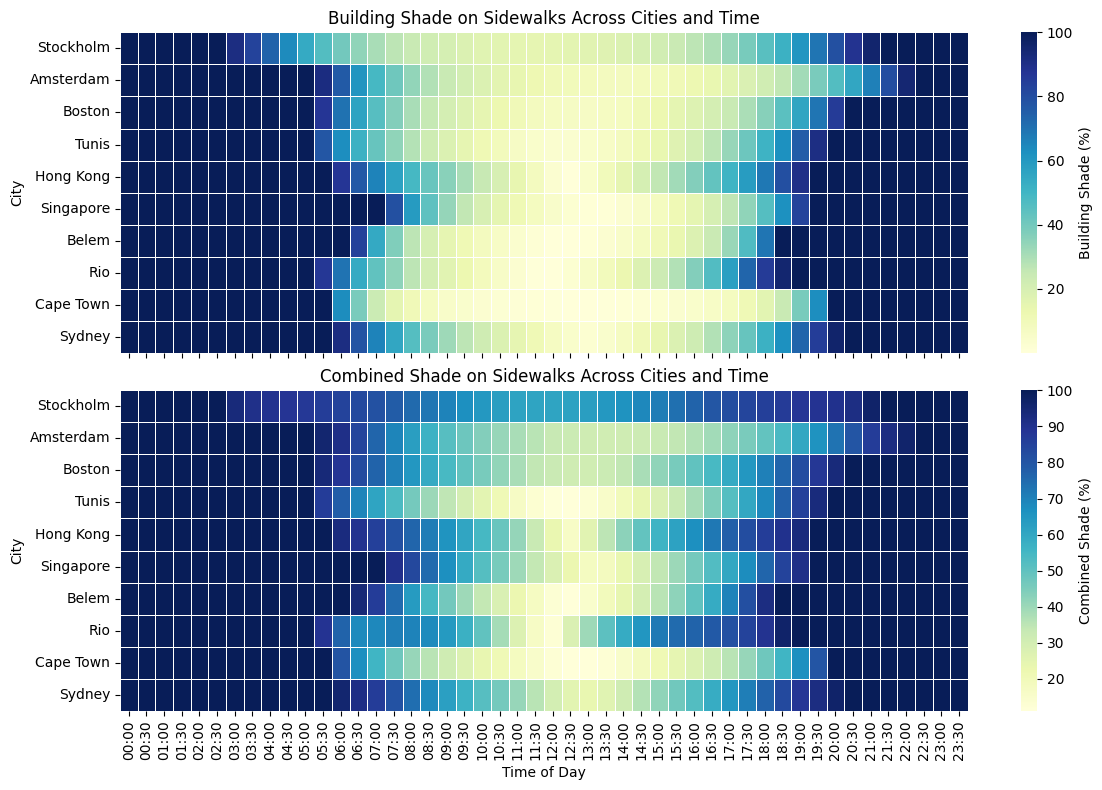

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two heatmaps
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Building shade heatmap
sns.heatmap(
    building_shade_df, 
    ax=axes[0], 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Building Shade (%)'},
    linewidths=0.5
)
axes[0].set_title("Building Shade on Sidewalks Across Cities and Time")
axes[0].set_ylabel("City")

# Tree shade heatmap
sns.heatmap(
    tree_shade_df, 
    ax=axes[1], 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Combined Shade (%)'},
    linewidths=0.5
)
axes[1].set_title("Combined Shade on Sidewalks Across Cities and Time")
axes[1].set_xlabel("Time of Day")
axes[1].set_ylabel("City")

plt.tight_layout()
plt.show()

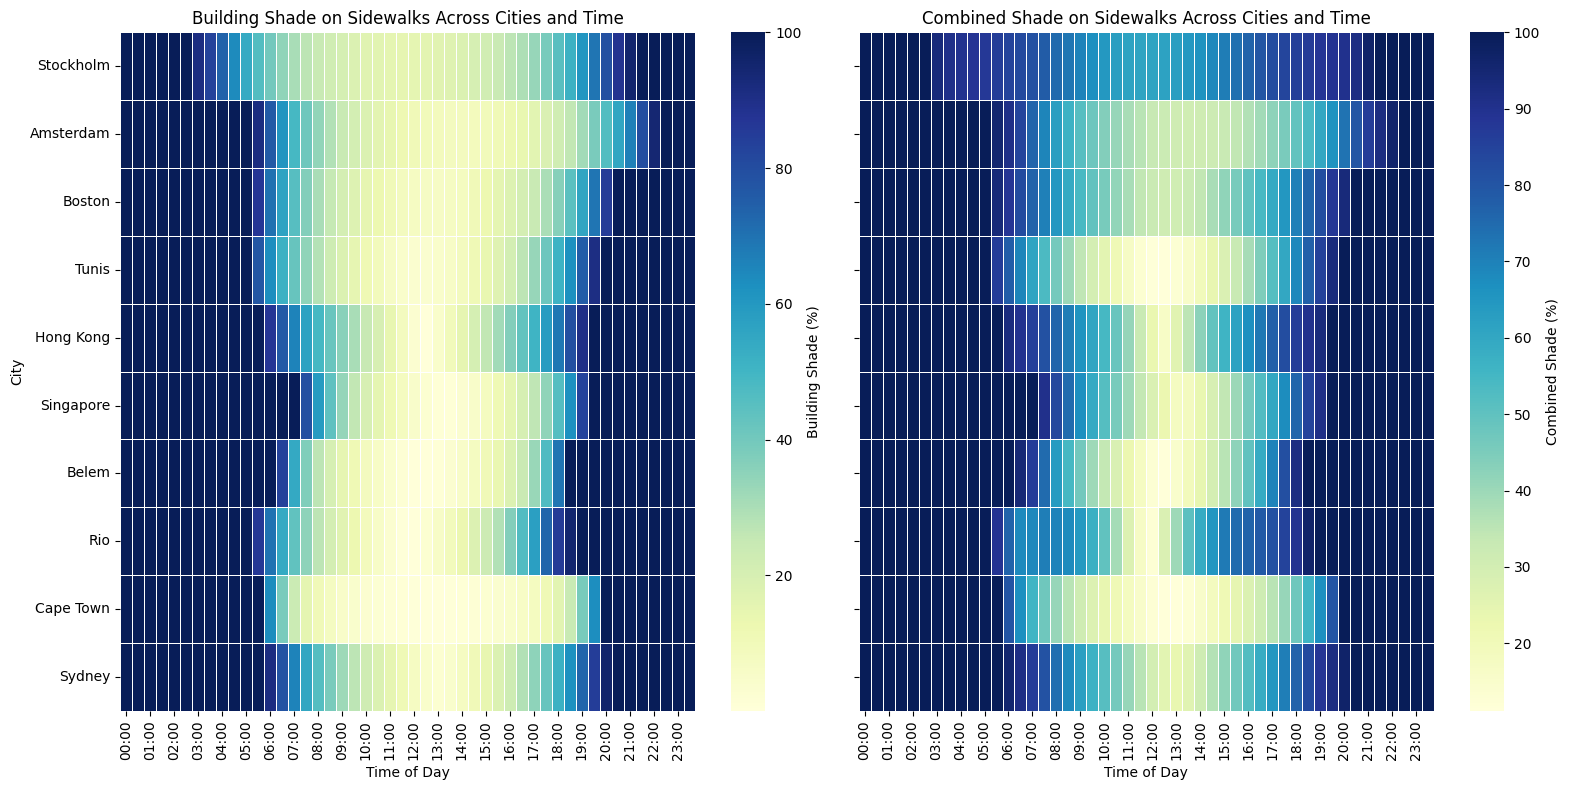

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two heatmaps arranged side by side, sharing the y-axis (cities)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Building shade heatmap on the left
sns.heatmap(
    building_shade_df, 
    ax=axes[0], 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Building Shade (%)'},
    linewidths=0.5
)
axes[0].set_title("Building Shade on Sidewalks Across Cities and Time")
axes[0].set_ylabel("City")
axes[0].set_xlabel("Time of Day")

# Tree shade heatmap on the right
sns.heatmap(
    tree_shade_df, 
    ax=axes[1], 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Combined Shade (%)'},
    linewidths=0.5
)
axes[1].set_title("Combined Shade on Sidewalks Across Cities and Time")
axes[1].set_xlabel("Time of Day")
# No need to set the y-label on the right since it's shared

plt.tight_layout()
plt.show()

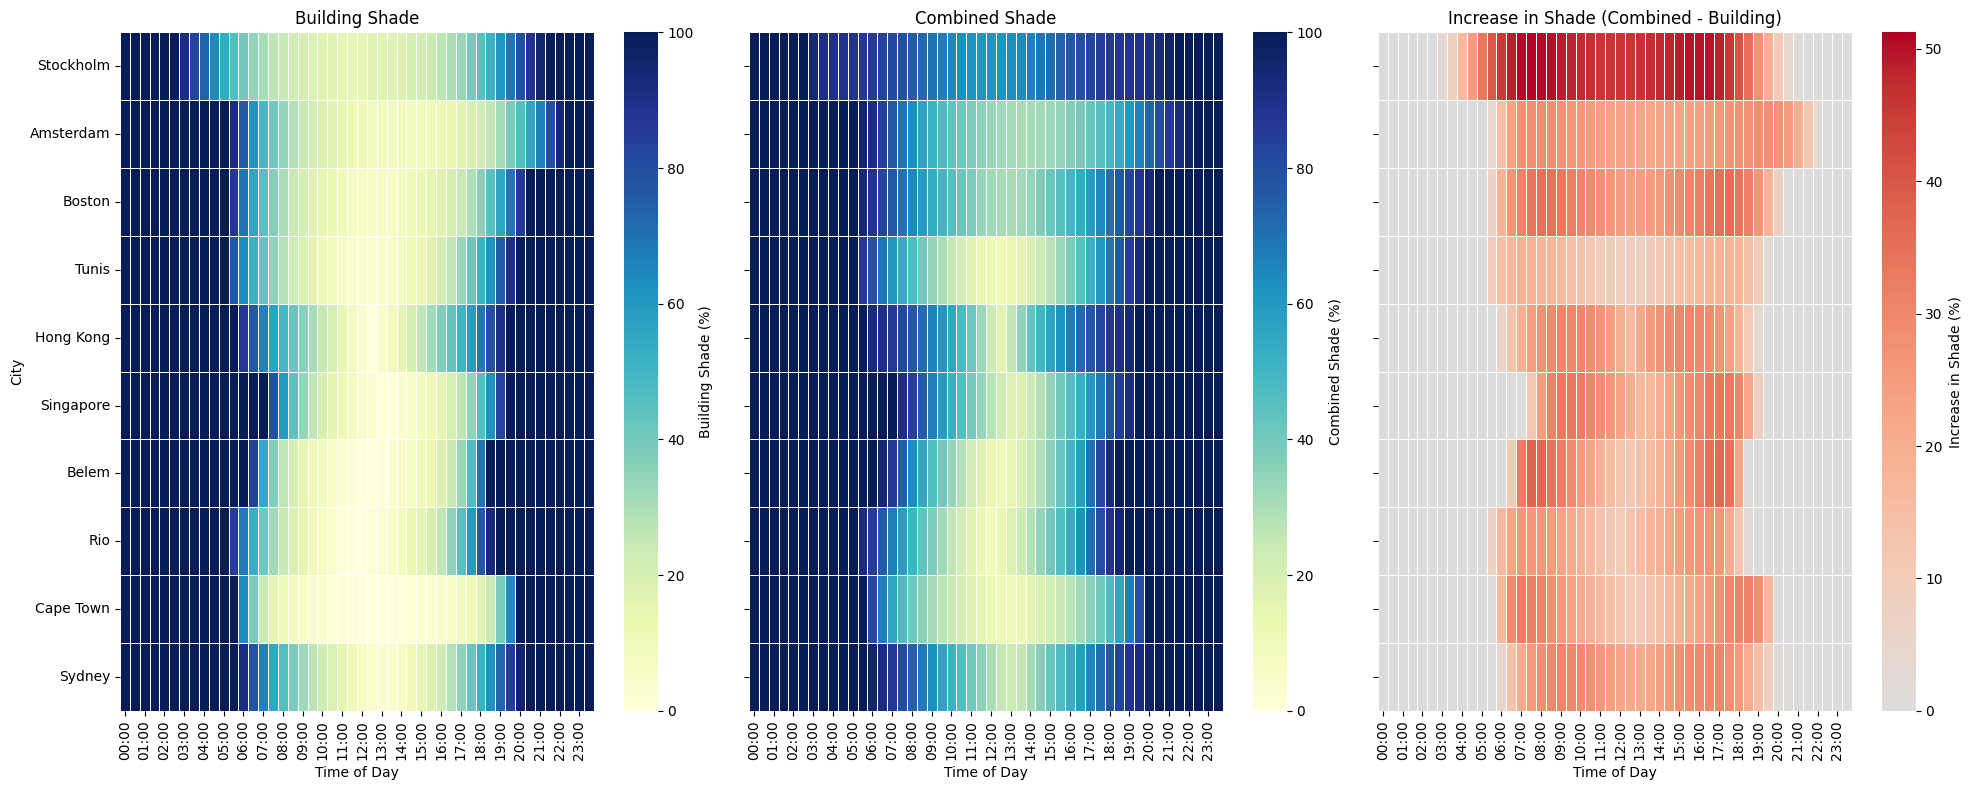

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the difference between combined shade and building shade
shade_diff = tree_shade_df - building_shade_df

# Create a figure with three subplots arranged side by side, sharing the y-axis (cities)
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

# Define the common minimum and maximum for the building and combined shade heatmaps
shade_vmin = 0
shade_vmax = 100

# Building shade heatmap
sns.heatmap(
    building_shade_df,
    ax=axes[0],
    cmap="YlGnBu",
    vmin=shade_vmin,   # set the minimum value
    vmax=shade_vmax,   # set the maximum value
    cbar_kws={'label': 'Building Shade (%)'},
    linewidths=0.5
)
axes[0].set_title("Building Shade")
axes[0].set_ylabel("City")
axes[0].set_xlabel("Time of Day")

# Combined shade heatmap
sns.heatmap(
    tree_shade_df,
    ax=axes[1],
    cmap="YlGnBu",
    vmin=shade_vmin,   # ensure the same min is used
    vmax=shade_vmax,   # and the same max is used
    cbar_kws={'label': 'Combined Shade (%)'},
    linewidths=0.5
)
axes[1].set_title("Combined Shade")
axes[1].set_xlabel("Time of Day")

# Difference heatmap (increase in shade)
sns.heatmap(
    shade_diff,
    ax=axes[2],
    cmap="coolwarm",   # diverging colormap for positive/negative differences
    center=0,          # center the colormap at 0 for the difference plot
    cbar_kws={'label': 'Increase in Shade (%)'},
    linewidths=0.5
)
axes[2].set_title("Increase in Shade (Combined - Building)")
axes[2].set_xlabel("Time of Day")

plt.tight_layout()
plt.show()

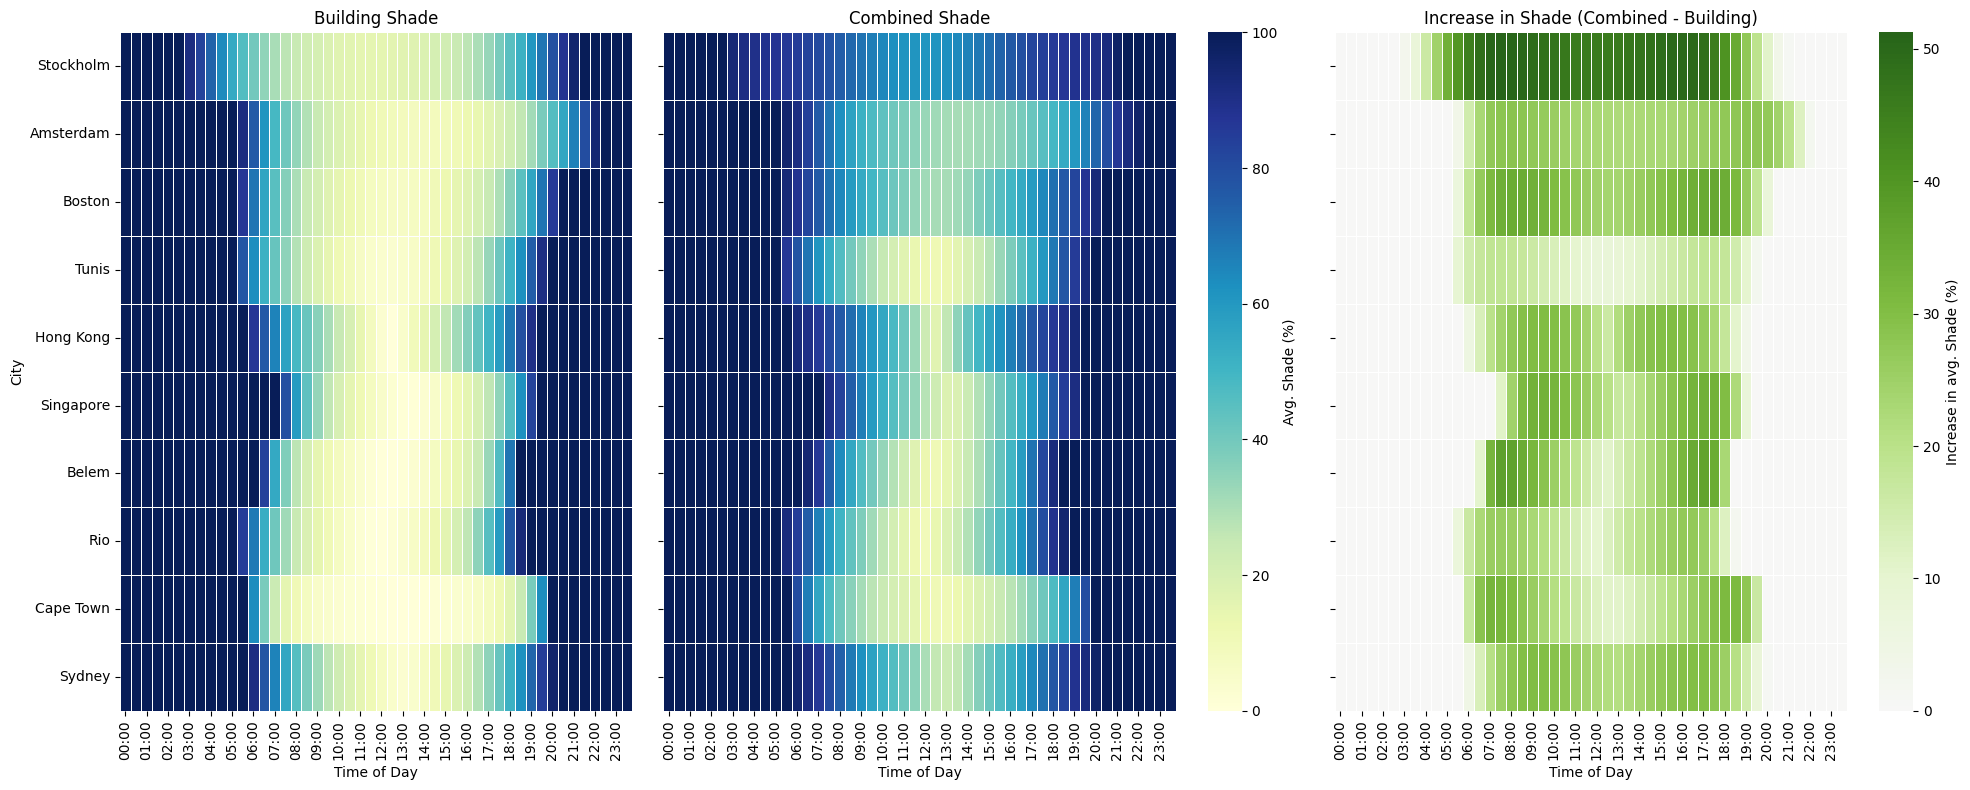

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the difference between combined shade and building shade
shade_diff = tree_shade_df - building_shade_df

# Define a common scale for the building and combined shade heatmaps
shade_vmin = 0
shade_vmax = 100

# Create a figure with three subplots.
# Adjust the width ratios so that the first plot (without a colorbar) is made slightly narrower.
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True, 
                           gridspec_kw={'width_ratios': [0.8, 1, 1]})

# Plot 1: Building shade heatmap (no colorbar)
sns.heatmap(
    building_shade_df,
    ax=axes[0],
    cmap="YlGnBu",
    vmin=shade_vmin,
    vmax=shade_vmax,
    cbar=False,       # remove the colorbar here
    linewidths=0.5
)
axes[0].set_title("Building Shade")
axes[0].set_ylabel("City")
axes[0].set_xlabel("Time of Day")

# Plot 2: Combined shade heatmap (with colorbar)
sns.heatmap(
    tree_shade_df,
    ax=axes[1],
    cmap="YlGnBu",
    vmin=shade_vmin,
    vmax=shade_vmax,
    cbar_kws={'label': 'Avg. Shade (%)'},
    linewidths=0.5
)
axes[1].set_title("Combined Shade")
axes[1].set_xlabel("Time of Day")

# Plot 3: Difference heatmap (with colorbar)
sns.heatmap(
    shade_diff,
    ax=axes[2],
    cmap="PiYG",   # diverging colormap for differences
    center=0,          # center the colormap at 0 for the difference plot
    cbar_kws={'label': 'Increase in avg. Shade (%)'},
    linewidths=0.5
)
axes[2].set_title("Increase in Shade (Combined - Building)")
axes[2].set_xlabel("Time of Day")

plt.tight_layout()
plt.show()

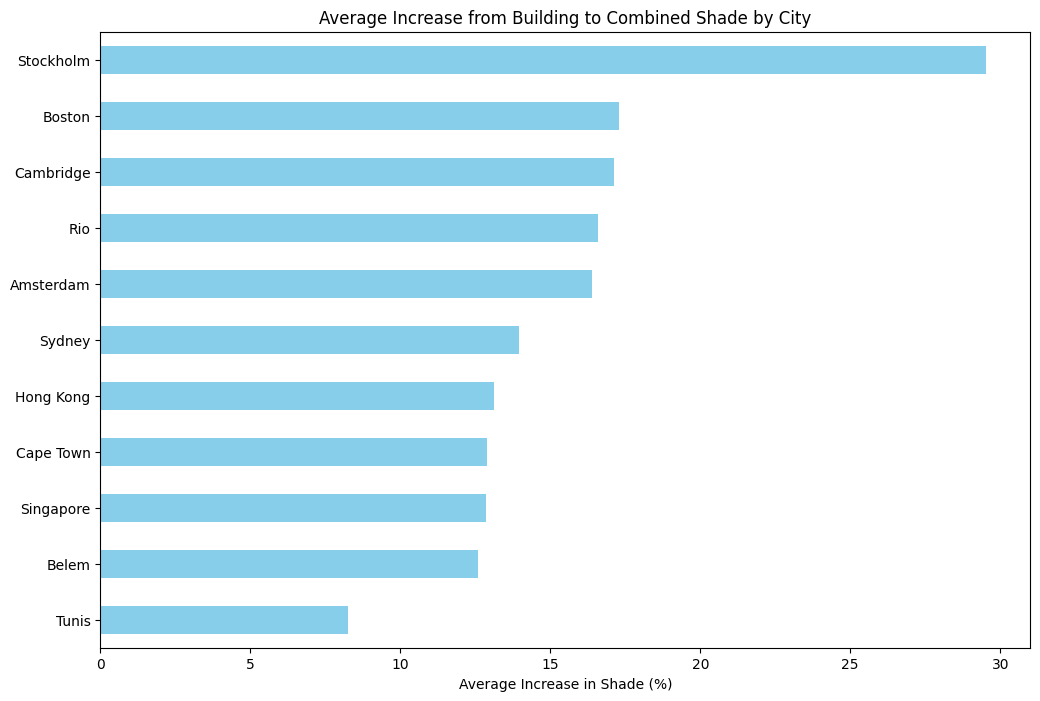

In [7]:
import matplotlib.pyplot as plt

# Calculate the average increase for each city across all times
avg_increase = shade_diff.mean(axis=1)
# Sort cities by average increase (descending)
avg_increase = avg_increase.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_increase.plot(kind='barh', color='skyblue')
plt.xlabel("Average Increase in Shade (%)")
plt.title("Average Increase from Building to Combined Shade by City")
plt.gca().invert_yaxis()  # optional: highest increase on top
plt.show()

/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'clip_on', 'linewidth'
  cset = contour_func(
/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'clip_on', 'linewidth'
  cset = contour_func(
/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'clip_on', 'linewidth'
  cset = contour_func(
/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'clip_on', 'linewidth'
  cset = contour_func(
/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs we

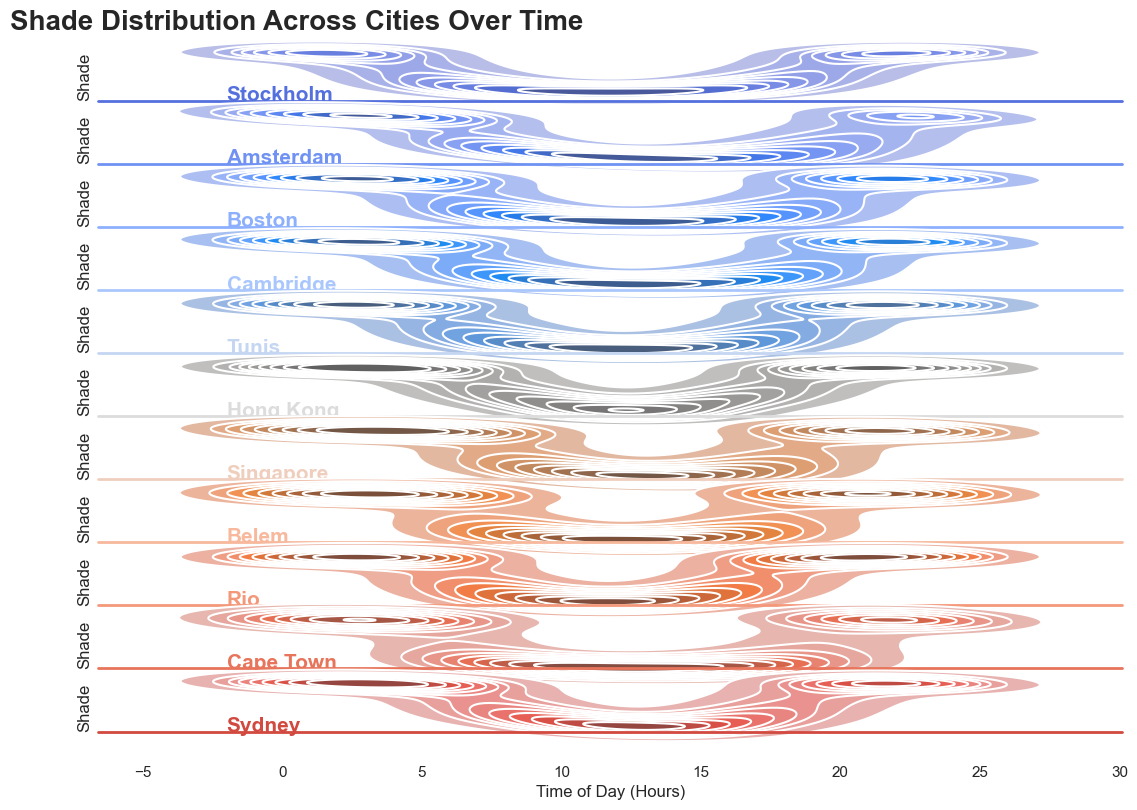

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Melt the DataFrames
building_shade_melted = building_shade_df.reset_index().melt(
    id_vars="index", var_name="Time", value_name="Shade"
)
building_shade_melted.rename(columns={"index": "City"}, inplace=True)

# Convert "Time" to numeric hours for plotting
building_shade_melted["Time"] = pd.to_datetime(building_shade_melted["Time"], format="%H:%M").dt.hour + \
                                pd.to_datetime(building_shade_melted["Time"], format="%H:%M").dt.minute / 60

# Compute city-wide mean shade percentage for color mapping
city_mean_shade = building_shade_melted.groupby("City")["Shade"].mean()
building_shade_melted["mean_shade"] = building_shade_melted["City"].map(city_mean_shade)

# ✅ Generate a discrete color list from the colormap
n_cities = building_shade_melted["City"].nunique()
pal = sns.color_palette("coolwarm", n_colors=n_cities)  # This creates a discrete list

# Create the FacetGrid
g = sns.FacetGrid(
    building_shade_melted,
    row="City",
    hue="City",  # Keep discrete city-based coloring
    aspect=15,
    height=0.75,
    palette=pal,  # ✅ Now using a discrete color list
)

# Add KDE plots
g.map(
    sns.kdeplot,
    "Time",
    "Shade",
    bw_adjust=0.6,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)

# Add contour lines for clarity
g.map(
    sns.kdeplot,
    "Time",
    "Shade",
    bw_adjust=0.6,
    clip_on=False,
    color="w",
    lw=2,
)

# Add horizontal line for each plot
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Label cities with corresponding colors
for i, ax in enumerate(g.axes.flat):
    city_name = building_shade_melted["City"].unique()[i]
    ax.text(
        -2, 0.02, city_name, 
        fontweight="bold",
        fontsize=15,
        color=ax.lines[-1].get_color(),
    )

# Adjust subplot spacing to create overlap
g.fig.subplots_adjust(hspace=-0.3)

# Remove unnecessary elements
g.set_titles("")
g.set(yticks=[], xlabel="Time of Day (Hours)")
g.despine(bottom=True, left=True)

# Add a title
g.fig.suptitle(
    "Shade Distribution Across Cities Over Time",
    ha="right",
    fontsize=20,
    fontweight="bold",
)

plt.show()

In [10]:
print(building_shade_melted.groupby("City")["Shade"].count())

City
Amsterdam    48
Belem        48
Boston       48
Cambridge    48
Cape Town    48
Hong Kong    48
Rio          48
Singapore    48
Stockholm    48
Sydney       48
Tunis        48
Name: Shade, dtype: int64


/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'clip_on', 'linewidth'
  cset = contour_func(
/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'clip_on', 'linewidth'
  cset = contour_func(
/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'clip_on', 'linewidth'
  cset = contour_func(
/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'clip_on', 'linewidth'
  cset = contour_func(
/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs we

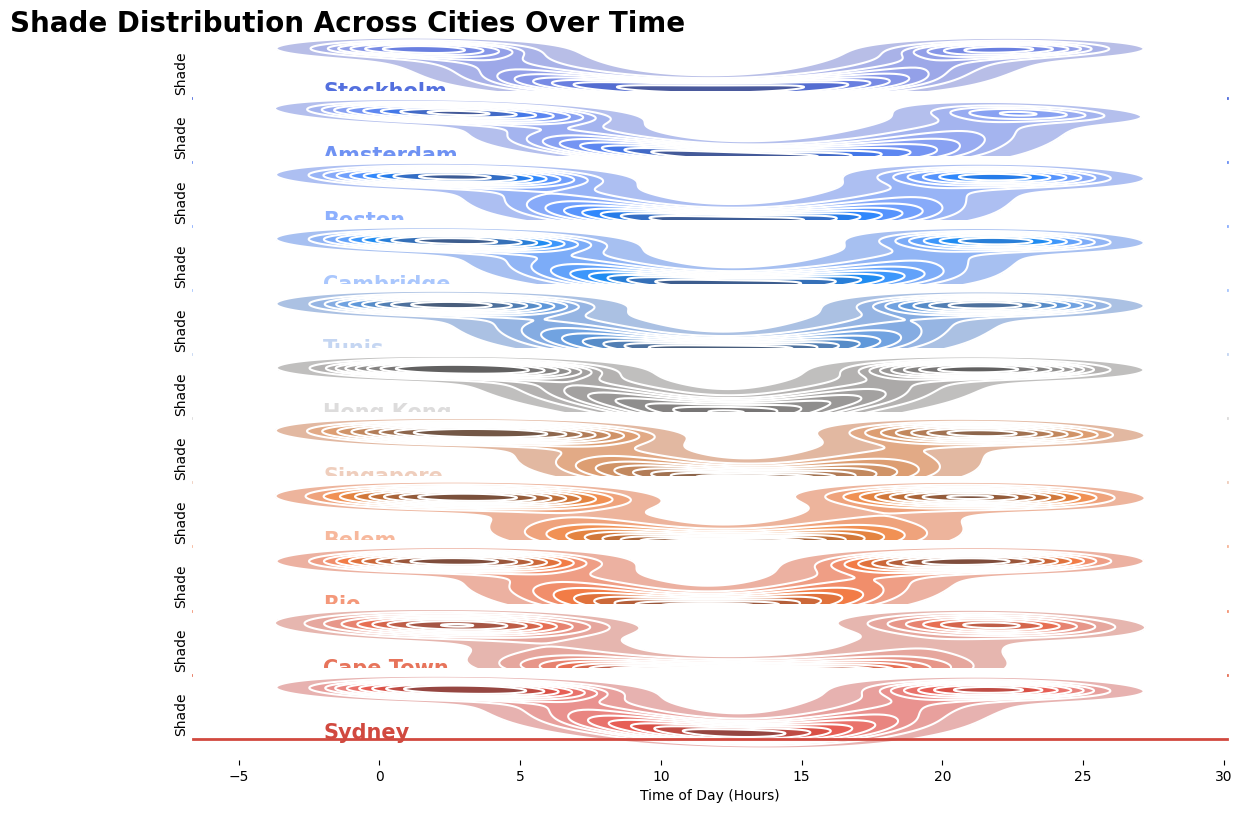

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames to prepare them for ridge plotting
building_shade_melted = building_shade_df.reset_index().melt(
    id_vars="index", var_name="Time", value_name="Shade"
)
building_shade_melted.rename(columns={"index": "City"}, inplace=True)

# Convert "Time" to a numeric format (e.g., hours) for plotting
building_shade_melted["Time"] = pd.to_datetime(building_shade_melted["Time"], format="%H:%M").dt.hour + pd.to_datetime(
    building_shade_melted["Time"], format="%H:%M"
).dt.minute / 60

# Generate a color palette
pal = sns.color_palette("coolwarm", n_colors=building_shade_melted["City"].nunique())

# Create the FacetGrid
g = sns.FacetGrid(
    building_shade_melted,
    row="City",
    hue="City",
    aspect=15,
    height=0.75,
    palette=pal,
)

# Add KDE plots for each city (ridge style)
g.map(
    sns.kdeplot,
    "Time",
    "Shade",
    bw_adjust=0.6,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)

# Add white contour lines for clarity
g.map(
    sns.kdeplot,
    "Time",
    "Shade",
    bw_adjust=0.6,
    clip_on=False,
    color="w",
    lw=2,
)

# Add horizontal lines for each plot
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Add city names to each plot with the corresponding color
for i, ax in enumerate(g.axes.flat):
    city_name = building_shade_melted["City"].unique()[i]
    ax.text(
        -2, 0.02, city_name,  # Adjust x and y positions for text
        fontweight="bold",
        fontsize=15,
        color=ax.lines[-1].get_color(),
    )

# Adjust subplot spacing to create overlap
g.fig.subplots_adjust(hspace=-0.3)

# Remove unnecessary elements (spines, yticks, titles)
g.set_titles("")
g.set(yticks=[], xlabel="Time of Day (Hours)")
g.despine(bottom=True, left=True)

# Add a global title
g.fig.suptitle(
    "Shade Distribution Across Cities Over Time",
    ha="right",
    fontsize=20,
    fontweight="bold",
)

# Show the plot
plt.show()

/data2/lukas/projects/throwing_shade/.shade_env/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


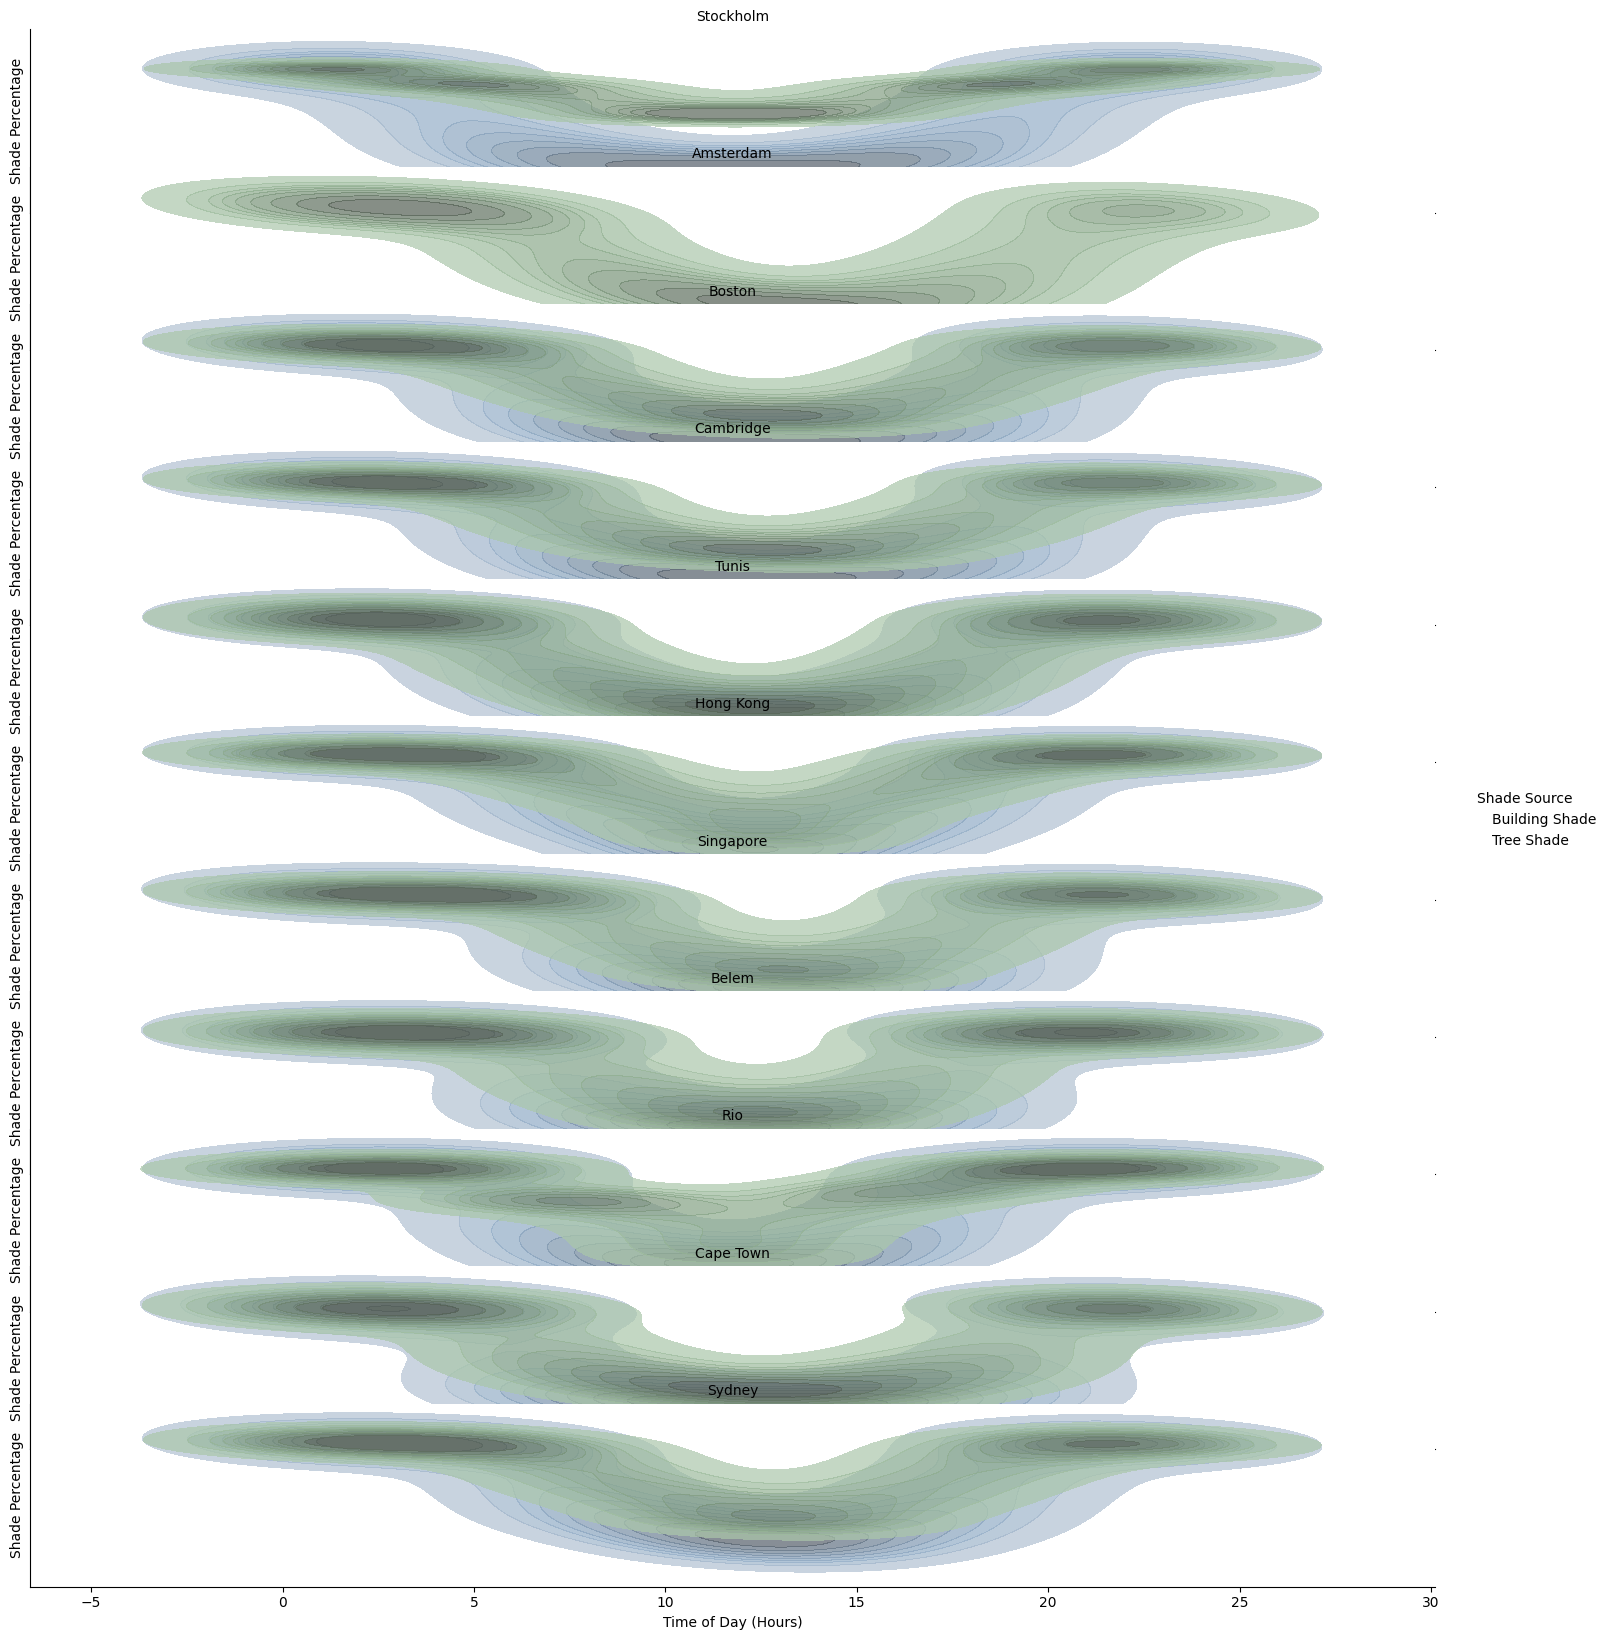

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrames to prepare them for ridge plotting
building_shade_melted = building_shade_df.reset_index().melt(
    id_vars="index", var_name="Time", value_name="Shade"
)
building_shade_melted.rename(columns={"index": "City"}, inplace=True)
building_shade_melted["Source"] = "Building Shade"

tree_shade_melted = tree_shade_df.reset_index().melt(
    id_vars="index", var_name="Time", value_name="Shade"
)
tree_shade_melted.rename(columns={"index": "City"}, inplace=True)
tree_shade_melted["Source"] = "Tree Shade"

# Combine both melted DataFrames for plotting
combined_shade_melted = pd.concat([building_shade_melted, tree_shade_melted])

# Convert "Time" to a numeric format (e.g., hours) for plotting
combined_shade_melted["Time"] = pd.to_datetime(combined_shade_melted["Time"], format="%H:%M").dt.hour + pd.to_datetime(combined_shade_melted["Time"], format="%H:%M").dt.minute / 60

# Set up the figure for ridge plots
g = sns.FacetGrid(
    combined_shade_melted,
    row="City",
    hue="Source",
    aspect=10,
    height=1.5,
    palette={"Building Shade": "#8DA9C4", "Tree Shade": "#A9CDA9"},
    sharex=True,
    sharey=False,
)

# Create the ridge plots
g.map(
    sns.kdeplot,
    "Time",
    "Shade",
    fill=True,
    alpha=0.7,
    bw_adjust=0.6,
)

# Customize the appearance
g.set_titles("{row_name}")
g.set_axis_labels("Time of Day (Hours)", "Shade Percentage")
g.fig.subplots_adjust(hspace=-0.25)  # Overlap rows slightly for ridge effect
g.set(yticks=[])

# Add legend
g.add_legend(title="Shade Source")

plt.show()

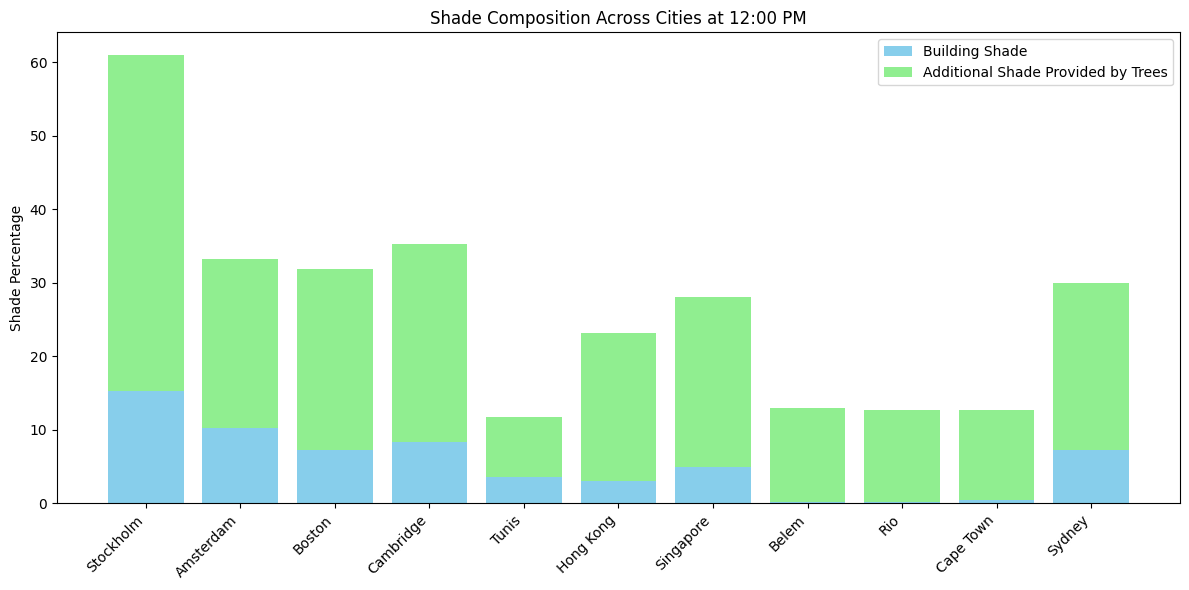

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

# Example: Plot for one specific time interval (e.g., 12:00 PM)
time_idx = building_shade_df.columns.get_loc("12:00")
x = np.arange(len(building_shade_df.index))  # Index for cities
building_values = building_shade_df.iloc[:, time_idx]
tree_values = tree_shade_df.iloc[:, time_idx] - building_shade_df.iloc[:, time_idx]  # Additional tree contribution

# Stacked bar chart
ax.bar(x, building_values, label="Building Shade", color="skyblue")
ax.bar(x, tree_values, bottom=building_values, label="Additional Shade Provided by Trees", color="lightgreen")

# Add labels and legend
ax.set_xticks(x)
ax.set_xticklabels(building_shade_df.index, rotation=45, ha='right')
ax.set_ylabel("Shade Percentage")
ax.set_title("Shade Composition Across Cities at 12:00 PM")
ax.legend()

plt.tight_layout()
plt.show()

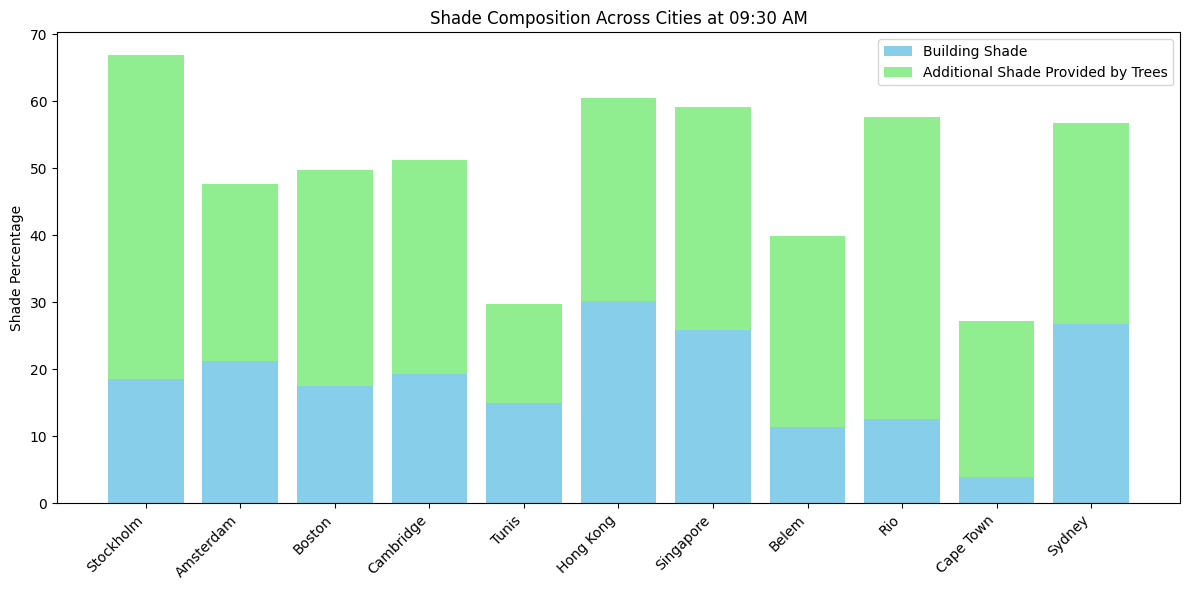

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

# Example: Plot for one specific time interval (e.g., 12:00 PM)
time_idx = building_shade_df.columns.get_loc("09:30")
x = np.arange(len(building_shade_df.index))  # Index for cities
building_values = building_shade_df.iloc[:, time_idx]
tree_values = tree_shade_df.iloc[:, time_idx] - building_shade_df.iloc[:, time_idx]  # Additional tree contribution

# Stacked bar chart
ax.bar(x, building_values, label="Building Shade", color="skyblue")
ax.bar(x, tree_values, bottom=building_values, label="Additional Shade Provided by Trees", color="lightgreen")

# Add labels and legend
ax.set_xticks(x)
ax.set_xticklabels(building_shade_df.index, rotation=45, ha='right')
ax.set_ylabel("Shade Percentage")
ax.set_title("Shade Composition Across Cities at 09:30 AM")
ax.legend()

plt.tight_layout()
plt.show()

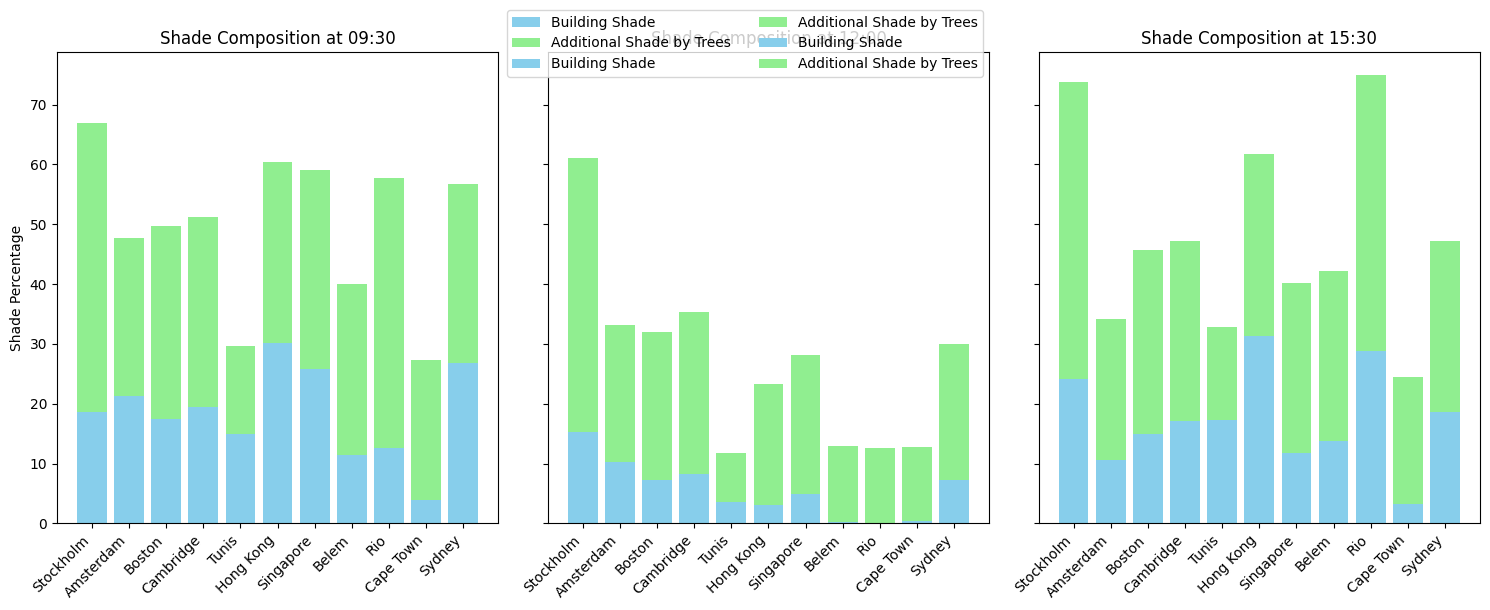

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time intervals you want to compare
time_intervals = ["09:30", "12:00", "15:30"]  # Example timesteps
time_indices = [building_shade_df.columns.get_loc(t) for t in time_intervals]

# Set up the figure and axes for multiple subplots
fig, axes = plt.subplots(1, len(time_intervals), figsize=(15, 6), sharey=True)

for ax, time_idx, time_label in zip(axes, time_indices, time_intervals):
    x = np.arange(len(building_shade_df.index))  # Index for cities
    building_values = building_shade_df.iloc[:, time_idx]
    tree_values = tree_shade_df.iloc[:, time_idx] - building_shade_df.iloc[:, time_idx]  # Additional tree contribution

    # Stacked bar chart
    ax.bar(x, building_values, label="Building Shade", color="skyblue")
    ax.bar(x, tree_values, bottom=building_values, label="Additional Shade by Trees", color="lightgreen")

    # Add labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(building_shade_df.index, rotation=45, ha='right')
    ax.set_title(f"Shade Composition at {time_label}")
    ax.set_ylabel("Shade Percentage" if ax == axes[0] else "")  # Add ylabel only on the first plot

# Add a shared legend
fig.legend(loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.02))
plt.tight_layout()
plt.show()

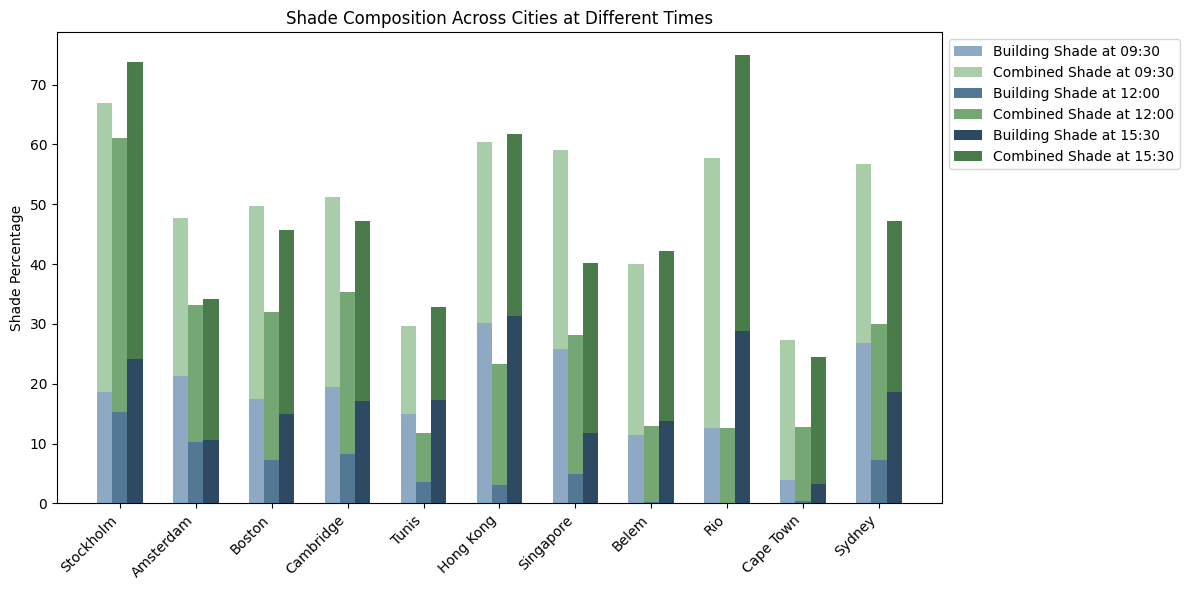

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time intervals you want to compare
time_intervals = ["09:30", "12:00", "15:30"]  # Example timesteps
time_indices = [building_shade_df.columns.get_loc(t) for t in time_intervals]

# Prepare data for grouped bar chart
x = np.arange(len(building_shade_df.index))  # Index for cities
bar_width = 0.2  # Width of each bar
offsets = np.linspace(-bar_width, bar_width, len(time_intervals))  # Offsets for each time interval

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define a shade-related color palette
colors = {
    "building_shade": ["#8DA9C4", "#537895", "#2E4A62"],  # Muted blues for building shade
    "tree_shade": ["#A9CDA9", "#74A774", "#4A7B4A"],      # Muted greens for tree shade
}

# Plot data for each time interval
for i, (time_idx, time_label) in enumerate(zip(time_indices, time_intervals)):
    building_values = building_shade_df.iloc[:, time_idx]
    tree_values = tree_shade_df.iloc[:, time_idx] - building_shade_df.iloc[:, time_idx]  # Additional tree contribution
    
    # Bars for building shade
    ax.bar(x + offsets[i], building_values, bar_width, label=f"Building Shade at {time_label}", color=colors["building_shade"][i])
    # Bars for tree shade (stacked above building shade)
    ax.bar(x + offsets[i], tree_values, bar_width, bottom=building_values, label=f"Combined Shade at {time_label}", color=colors["tree_shade"][i])

# Add labels and legend
ax.set_xticks(x)
ax.set_xticklabels(building_shade_df.index, rotation=45, ha='right')
ax.set_ylabel("Shade Percentage")
ax.set_title("Shade Composition Across Cities at Different Times")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

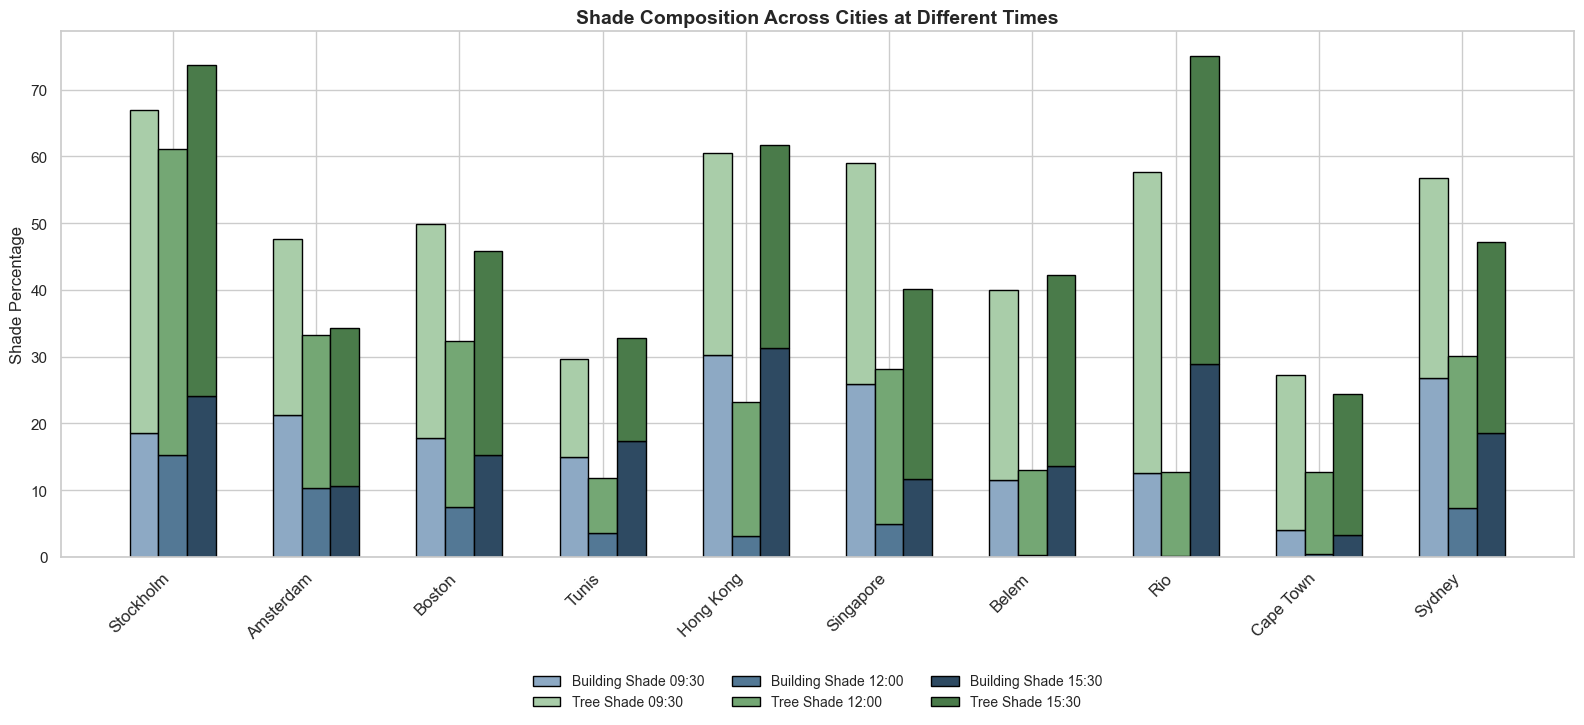

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

# Use Seaborn's theme for a modern look (adjust the style as desired)
sns.set_theme(style="whitegrid")  # This replaces plt.style.use('seaborn-whitegrid')

# Define the time intervals you want to compare
time_intervals = ["09:30", "12:00", "15:30"]
# Get the column indices for these time labels in the DataFrame
time_indices = [building_shade_df.columns.get_loc(t) for t in time_intervals]

# Prepare data for grouped bar chart
cities = building_shade_df.index.tolist()
x = np.arange(len(cities))  # x positions for cities
bar_width = 0.2             # width of each bar
offsets = np.linspace(-bar_width, bar_width, len(time_intervals))  # Offsets for each time interval

# Define color palettes for building and tree shade components
colors_building = ["#8DA9C4", "#537895", "#2E4A62"]
colors_tree = ["#A9CDA9", "#74A774", "#4A7B4A"]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Plot data for each time interval
for i, (time_idx, time_label) in enumerate(zip(time_indices, time_intervals)):
    # Retrieve the building shade values and compute the tree contribution
    building_values = building_shade_df.iloc[:, time_idx]
    tree_values = tree_shade_df.iloc[:, time_idx] - building_shade_df.iloc[:, time_idx]
    
    # Plot the building shade as a bar
    ax.bar(x + offsets[i],
           building_values,
           bar_width,
           color=colors_building[i],
           edgecolor='black')
    
    # Plot the tree shade stacked on top of the building shade
    ax.bar(x + offsets[i],
           tree_values,
           bar_width,
           bottom=building_values,
           color=colors_tree[i],
           edgecolor='black')

# Create custom legend entries using Patch so we avoid duplicate legend items
legend_entries = []
for i, time_label in enumerate(time_intervals):
    legend_entries.append(Patch(facecolor=colors_building[i],
                                edgecolor='black',
                                label=f"Building Shade {time_label}"))
    legend_entries.append(Patch(facecolor=colors_tree[i],
                                edgecolor='black',
                                label=f"Tree Shade {time_label}"))

# Place the legend at the bottom outside of the plot area
ax.legend(handles=legend_entries,
          loc='upper center',
          bbox_to_anchor=(0.5, -0.2),
          ncol=3,
          frameon=False,
          fontsize=10)

# Set axis labels, title, and tick parameters for clarity
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45, ha='right', fontsize=12)
ax.set_ylabel("Shade Percentage", fontsize=12)
# ax.set_xlabel("City", fontsize=12)
ax.set_title("Shade Composition Across Cities at Different Times", fontsize=14, fontweight='bold')

# Adjust layout to ensure nothing gets cut off (especially the legend)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

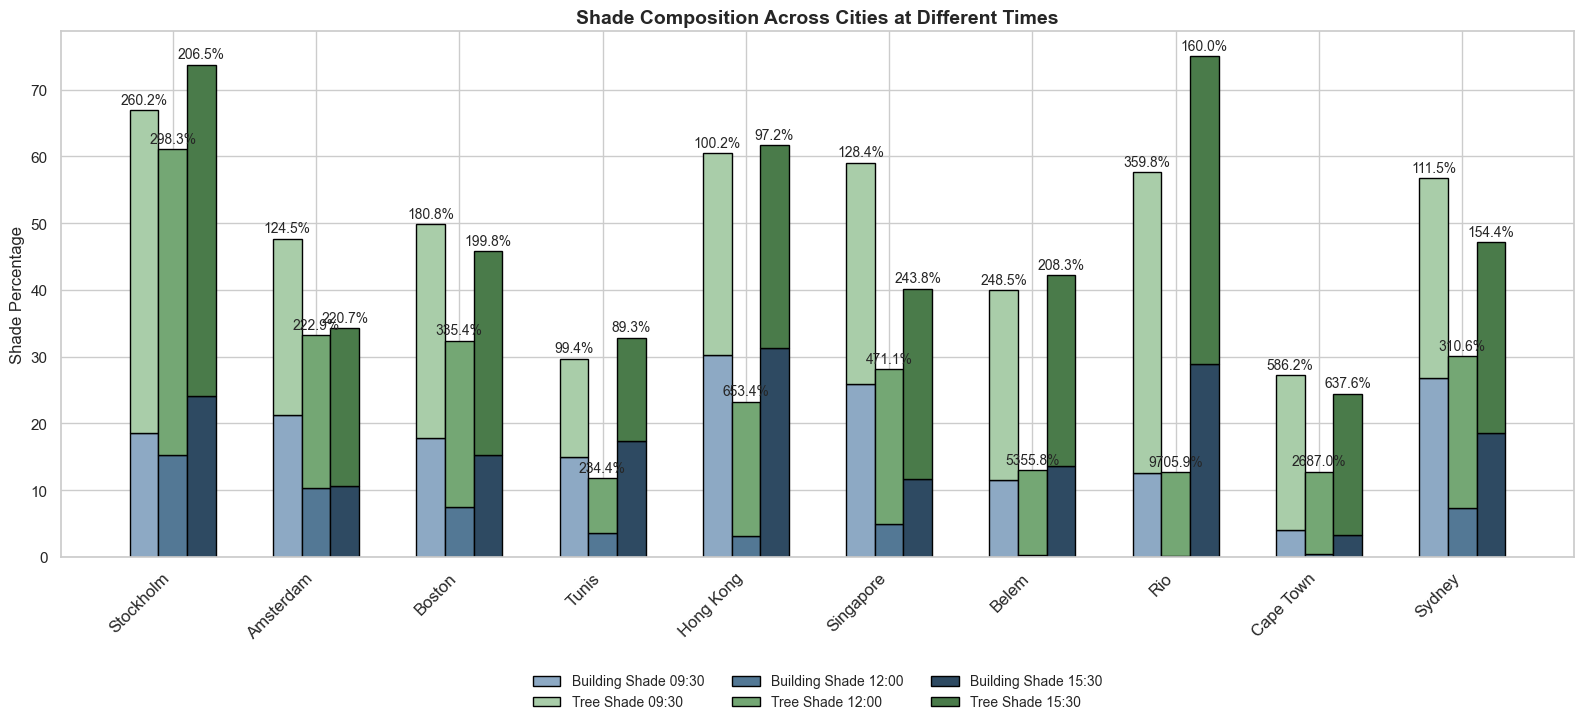

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

# Use Seaborn's theme for a modern look
sns.set_theme(style="whitegrid")

# Define the time intervals you want to compare
time_intervals = ["09:30", "12:00", "15:30"]
# Get the column indices for these time labels in the DataFrame
time_indices = [building_shade_df.columns.get_loc(t) for t in time_intervals]

# Prepare data for grouped bar chart
cities = building_shade_df.index.tolist()
x = np.arange(len(cities))  # x positions for cities
bar_width = 0.2             # width of each bar
offsets = np.linspace(-bar_width, bar_width, len(time_intervals))  # Offsets for each time interval

# Define color palettes for building and tree shade components
colors_building = ["#8DA9C4", "#537895", "#2E4A62"]
colors_tree = ["#A9CDA9", "#74A774", "#4A7B4A"]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Plot data for each time interval and annotate percentage increase due to trees
for i, (time_idx, time_label) in enumerate(zip(time_indices, time_intervals)):
    # Retrieve the building shade values and compute the tree contribution
    building_values = building_shade_df.iloc[:, time_idx]
    # Calculate the additional shade provided by trees (stacked on top of building shade)
    tree_values = tree_shade_df.iloc[:, time_idx] - building_shade_df.iloc[:, time_idx]
    
    # Plot the building shade as a bar
    ax.bar(x + offsets[i],
           building_values,
           bar_width,
           color=colors_building[i],
           edgecolor='black')
    
    # Plot the tree shade stacked on top of the building shade
    ax.bar(x + offsets[i],
           tree_values,
           bar_width,
           bottom=building_values,
           color=colors_tree[i],
           edgecolor='black')
    
    # Loop through each city for the current time interval to annotate percentage increase
    for pos, b, t in zip(x + offsets[i], building_values, tree_values):
        total = b + t
        # Only annotate if building shade is nonzero to avoid division by zero.
        if b > 0:
            percentage_increase = (t / b) * 100
            # Place the text slightly above the top of the bar (adjust vertical offset as needed)
            ax.text(pos, total + 0.5, f"{percentage_increase:.1f}%", 
                    ha='center', va='bottom', fontsize=10)
        else:
            # Optionally, handle the case when building shade is zero (e.g., annotate as "N/A" or skip)
            ax.text(pos, total + 0.5, "N/A", 
                    ha='center', va='bottom', fontsize=10, color='red')

# Create custom legend entries using Patch so we avoid duplicate legend items
legend_entries = []
for i, time_label in enumerate(time_intervals):
    legend_entries.append(Patch(facecolor=colors_building[i],
                                edgecolor='black',
                                label=f"Building Shade {time_label}"))
    legend_entries.append(Patch(facecolor=colors_tree[i],
                                edgecolor='black',
                                label=f"Tree Shade {time_label}"))

# Place the legend at the bottom outside of the plot area
ax.legend(handles=legend_entries,
          loc='upper center',
          bbox_to_anchor=(0.5, -0.2),
          ncol=3,
          frameon=False,
          fontsize=10)

# Set axis labels, title, and tick parameters for clarity
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45, ha='right', fontsize=12)
ax.set_ylabel("Shade Percentage", fontsize=12)
ax.set_title("Shade Composition Across Cities at Different Times", fontsize=14, fontweight='bold')

# Adjust layout to ensure nothing gets cut off (especially the legend)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

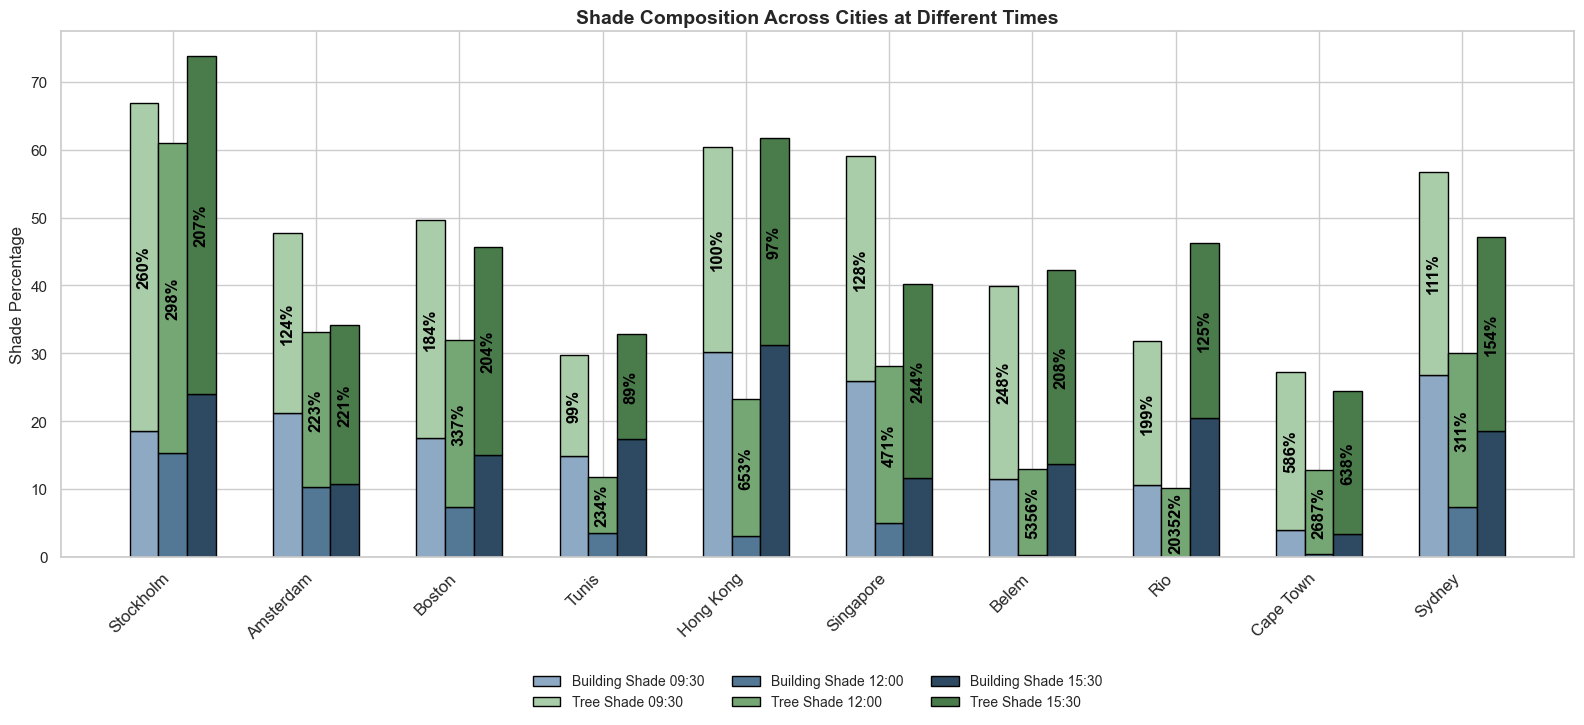

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

# Use Seaborn's theme for a modern look
sns.set_theme(style="whitegrid")

# Define the time intervals you want to compare
time_intervals = ["09:30", "12:00", "15:30"]
# Get the column indices for these time labels in the DataFrame
time_indices = [building_shade_df.columns.get_loc(t) for t in time_intervals]

# Prepare data for grouped bar chart
cities = building_shade_df.index.tolist()
x = np.arange(len(cities))  # x positions for cities
bar_width = 0.2             # width of each bar
offsets = np.linspace(-bar_width, bar_width, len(time_intervals))  # Offsets for each time interval

# Define color palettes for building and tree shade components
colors_building = ["#8DA9C4", "#537895", "#2E4A62"]
colors_tree = ["#A9CDA9", "#74A774", "#4A7B4A"]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Plot data for each time interval and annotate percentage increase inside the tree bar
for i, (time_idx, time_label) in enumerate(zip(time_indices, time_intervals)):
    # Retrieve the building shade values and compute the additional tree contribution
    building_values = building_shade_df.iloc[:, time_idx]
    tree_values = tree_shade_df.iloc[:, time_idx] - building_shade_df.iloc[:, time_idx]
    
    # Plot the building shade as a bar
    ax.bar(x + offsets[i],
           building_values,
           bar_width,
           color=colors_building[i],
           edgecolor='black')
    
    # Plot the tree shade stacked on top of the building shade
    ax.bar(x + offsets[i],
           tree_values,
           bar_width,
           bottom=building_values,
           color=colors_tree[i],
           edgecolor='black')
    
    # Annotate the percentage increase within the tree bar segment
    for pos, b, t in zip(x + offsets[i], building_values, tree_values):
        # If the building shade is greater than zero, calculate the percentage increase
        if b > 0:
            percentage_increase = (t / b) * 100
            # Compute y-position at the center of the tree shade segment
            y_text = b + t / 2
            ax.text(pos, y_text, f"{percentage_increase:.0f}%",
                    ha='center', va='center',
                    rotation=90, fontweight='bold',
                    color='black')
        else:
            # If building shade is zero, insert a placeholder "N/A"
            y_text = t / 2
            ax.text(pos, y_text, "N/A",
                    ha='center', va='center',
                    rotation=90, fontweight='bold',
                    color='red')

# Create custom legend entries using Patch so we avoid duplicate legend items
legend_entries = []
for i, time_label in enumerate(time_intervals):
    legend_entries.append(Patch(facecolor=colors_building[i],
                                edgecolor='black',
                                label=f"Building Shade {time_label}"))
    legend_entries.append(Patch(facecolor=colors_tree[i],
                                edgecolor='black',
                                label=f"Tree Shade {time_label}"))

# Place the legend at the bottom outside of the plot area
ax.legend(handles=legend_entries,
          loc='upper center',
          bbox_to_anchor=(0.5, -0.2),
          ncol=3,
          frameon=False,
          fontsize=10)

# Set axis labels, title, and tick parameters for clarity
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45, ha='right', fontsize=12)
ax.set_ylabel("Shade Percentage", fontsize=12)
ax.set_title("Shade Composition Across Cities at Different Times", fontsize=14, fontweight='bold')

# Adjust layout to ensure nothing gets cut off (especially the legend)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

### City Analysis

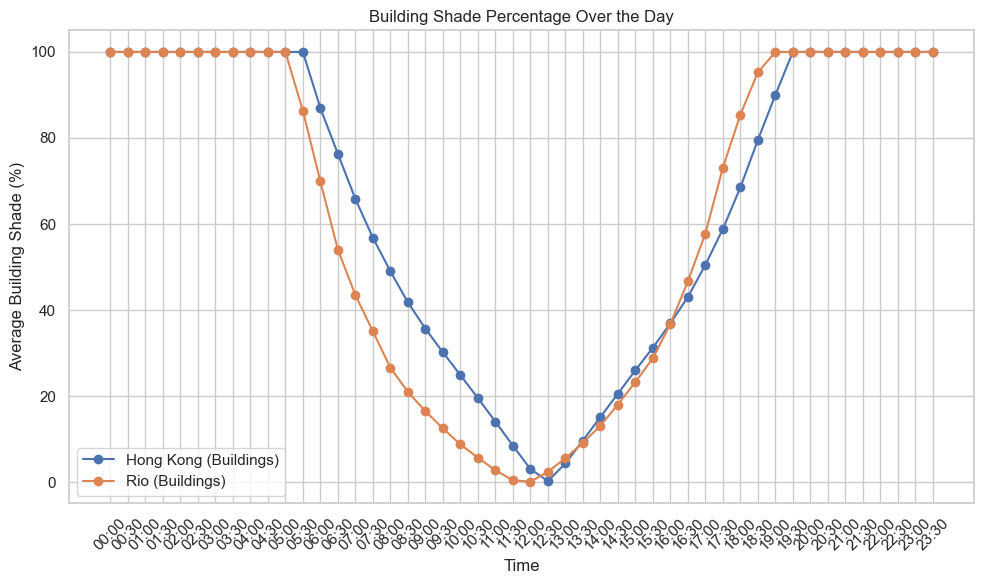

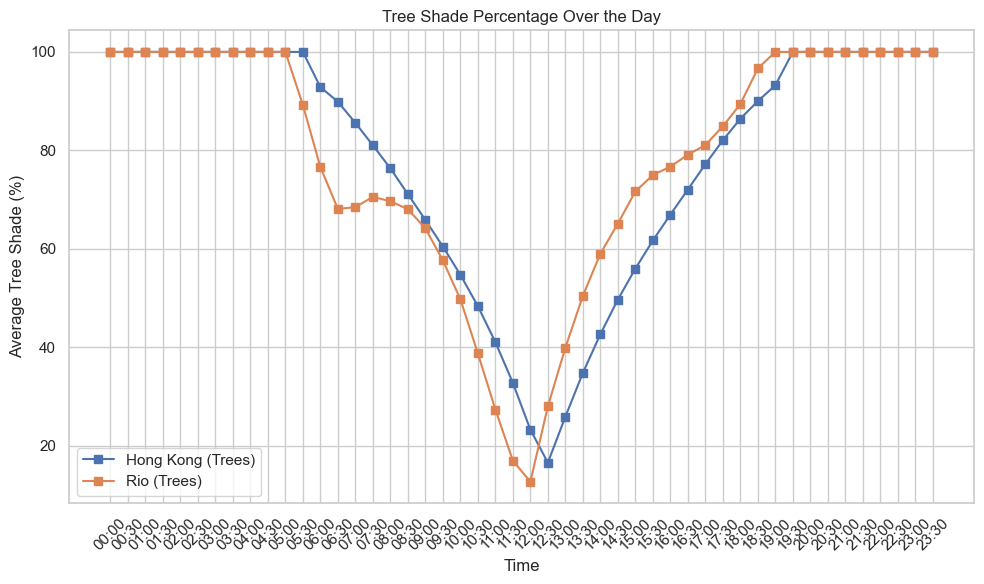

In [82]:
import matplotlib.pyplot as plt

# Choose a city pair to compare, e.g., Hong Kong and Rio.
cities_to_compare = ["Hong Kong", "Rio"]

# Extract time labels and shade data for the chosen cities.
times = [int(h.split(":")[0])*60 + int(h.split(":")[1]) for h in time_labels]  # in minutes for plotting

plt.figure(figsize=(10, 6))

# Plot building shade time series
for city in cities_to_compare:
    plt.plot(time_labels, building_shade_df.loc[city], marker='o', label=f"{city} (Buildings)")
    
plt.title("Building Shade Percentage Over the Day")
plt.xlabel("Time")
plt.ylabel("Average Building Shade (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Similarly, plot tree shade time series
plt.figure(figsize=(10, 6))

for city in cities_to_compare:
    plt.plot(time_labels, tree_shade_df.loc[city], marker='s', label=f"{city} (Trees)")
    
plt.title("Tree Shade Percentage Over the Day")
plt.xlabel("Time")
plt.ylabel("Average Tree Shade (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

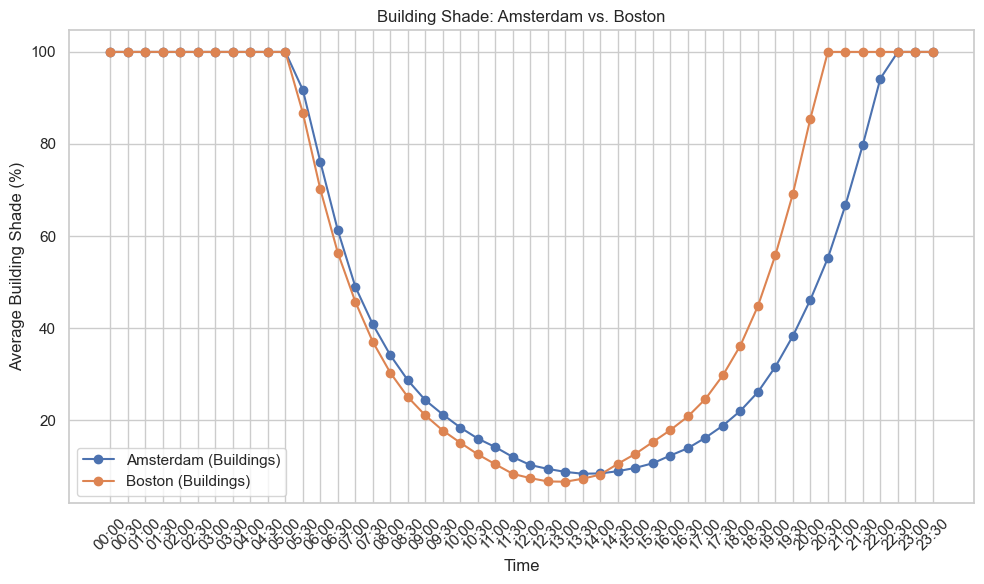

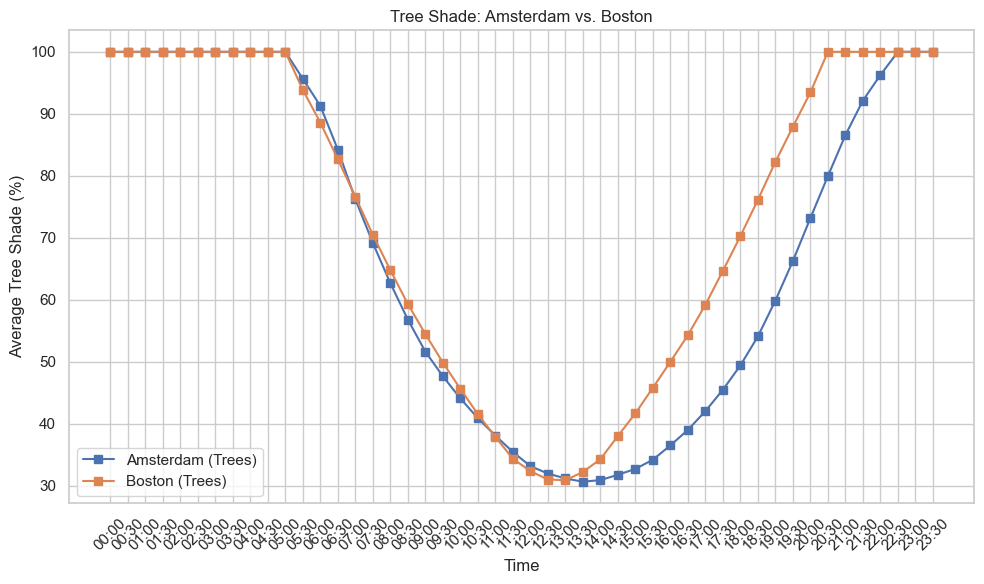

In [83]:
# Comparing Amsterdam and Boston
cities_to_compare = ["Amsterdam", "Boston"]

plt.figure(figsize=(10, 6))
for city in cities_to_compare:
    plt.plot(time_labels, building_shade_df.loc[city], marker='o', label=f"{city} (Buildings)")
    
plt.title("Building Shade: Amsterdam vs. Boston")
plt.xlabel("Time")
plt.ylabel("Average Building Shade (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for city in cities_to_compare:
    plt.plot(time_labels, tree_shade_df.loc[city], marker='s', label=f"{city} (Trees)")
    
plt.title("Tree Shade: Amsterdam vs. Boston")
plt.xlabel("Time")
plt.ylabel("Average Tree Shade (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

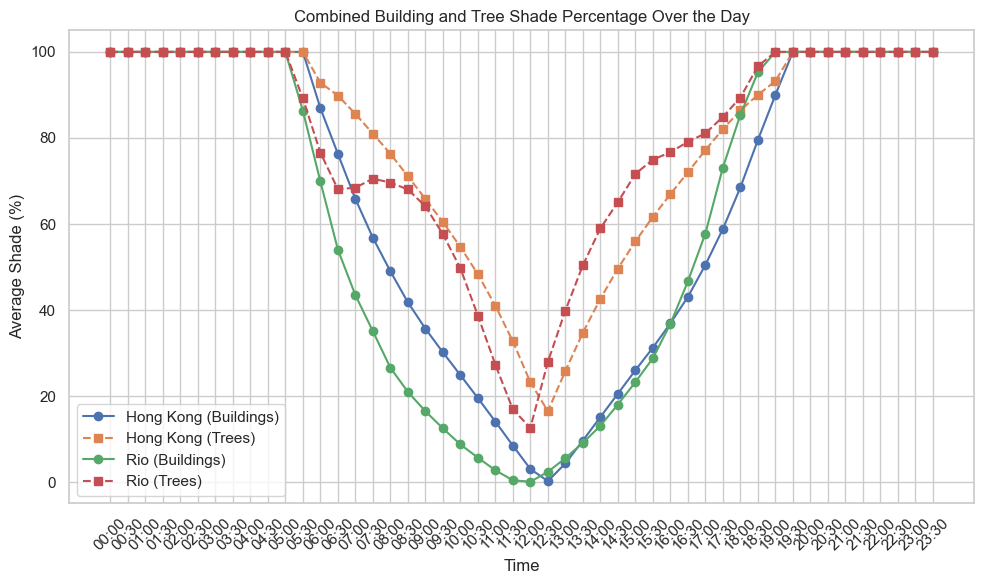

In [85]:
import matplotlib.pyplot as plt

# Choose a city pair to compare, e.g., Hong Kong and Rio.
cities_to_compare = ["Hong Kong", "Rio"]

plt.figure(figsize=(10, 6))

# For each city, plot both the building and tree shade series.
for city in cities_to_compare:
    # Plot building shade with a solid line and circle markers.
    plt.plot(time_labels, building_shade_df.loc[city],
             marker='o', linestyle='-', label=f"{city} (Buildings)")
    # Plot tree shade with a dashed line and square markers.
    plt.plot(time_labels, tree_shade_df.loc[city],
             marker='s', linestyle='--', label=f"{city} (Trees)")

plt.title("Combined Building and Tree Shade Percentage Over the Day")
plt.xlabel("Time")
plt.ylabel("Average Shade (%)")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

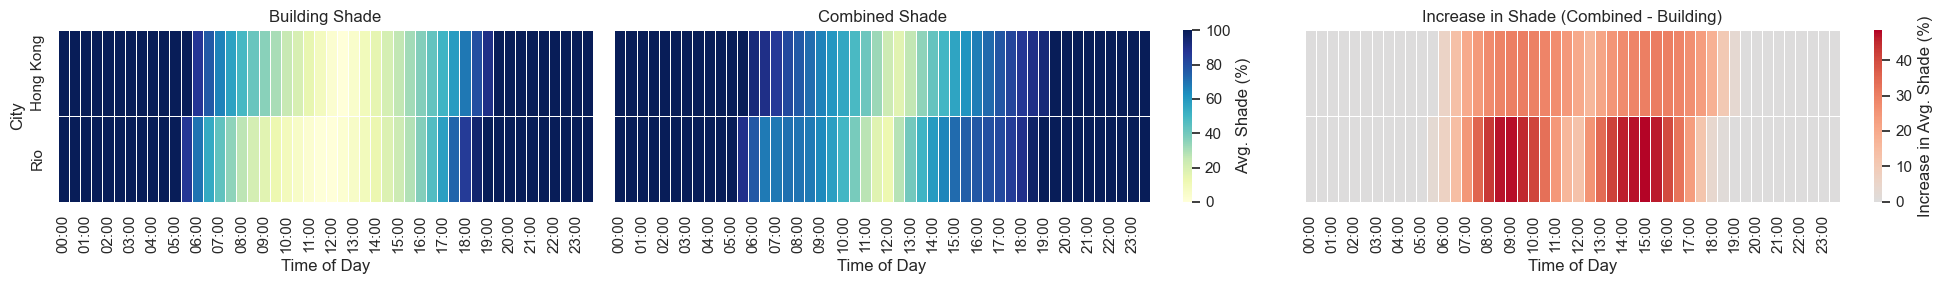

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the comparison cities
cities_to_compare = ["Hong Kong", "Rio"]

# Filter the DataFrames to include only the comparison cities.
comparison_building = building_shade_df.loc[cities_to_compare]
comparison_tree = tree_shade_df.loc[cities_to_compare]

# Compute the difference between the filtered tree and building shade.
comparison_diff = comparison_tree - comparison_building

# Define a common scale for the building and combined shade heatmaps.
shade_vmin = 0
shade_vmax = 100

# Create a figure with three subplots. Adjust width ratios as needed.
fig, axes = plt.subplots(1, 3, figsize=(20, 3), sharey=True, 
                           gridspec_kw={'width_ratios': [0.8, 1, 1]})

# Plot 1: Building shade heatmap (no colorbar)
sns.heatmap(
    comparison_building,
    ax=axes[0],
    cmap="YlGnBu",
    vmin=shade_vmin,
    vmax=shade_vmax,
    cbar=False,  # remove the colorbar here
    linewidths=0.5
)
axes[0].set_title("Building Shade")
axes[0].set_ylabel("City")
axes[0].set_xlabel("Time of Day")

# Plot 2: Combined (Tree) shade heatmap (with colorbar)
sns.heatmap(
    comparison_tree,
    ax=axes[1],
    cmap="YlGnBu",
    vmin=shade_vmin,
    vmax=shade_vmax,
    cbar_kws={'label': 'Avg. Shade (%)'},
    linewidths=0.5
)
axes[1].set_title("Combined Shade")
axes[1].set_xlabel("Time of Day")

# Plot 3: Difference heatmap (with colorbar)
sns.heatmap(
    comparison_diff,
    ax=axes[2],
    cmap="coolwarm",  # diverging colormap for differences
    center=0,         # center the colormap at 0 for the difference plot
    cbar_kws={'label': 'Increase in Avg. Shade (%)'},
    linewidths=0.5
)
axes[2].set_title("Increase in Shade (Combined - Building)")
axes[2].set_xlabel("Time of Day")

plt.tight_layout()
plt.show()

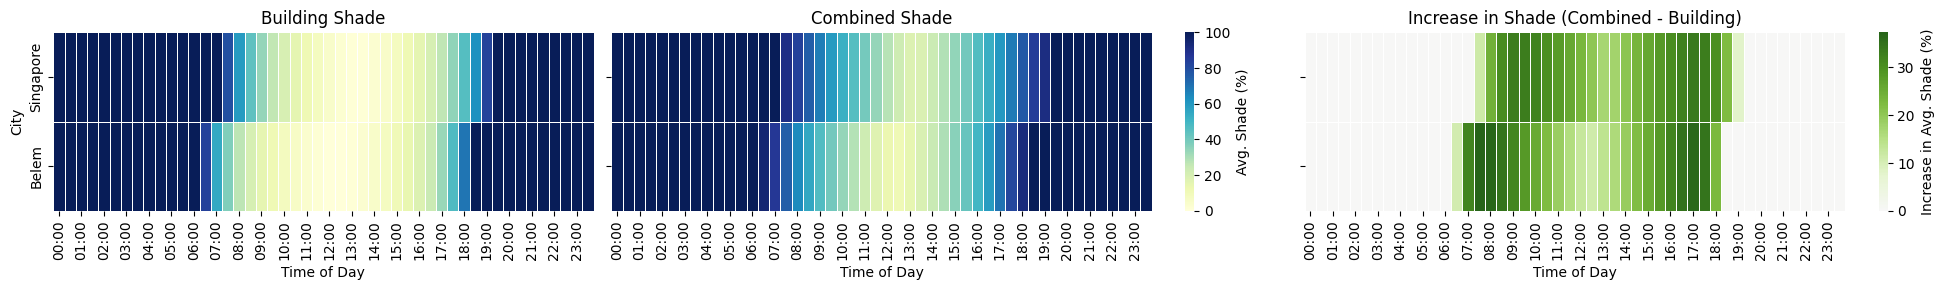

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the comparison cities
cities_to_compare = ["Singapore", "Belem"]

# Filter the DataFrames to include only the comparison cities.
comparison_building = building_shade_df.loc[cities_to_compare]
comparison_tree = tree_shade_df.loc[cities_to_compare]

# Compute the difference between the filtered tree and building shade.
comparison_diff = comparison_tree - comparison_building

# Define a common scale for the building and combined shade heatmaps.
shade_vmin = 0
shade_vmax = 100

# Create a figure with three subplots. Adjust width ratios as needed.
fig, axes = plt.subplots(1, 3, figsize=(20, 3), sharey=True, 
                           gridspec_kw={'width_ratios': [0.8, 1, 1]})

# Plot 1: Building shade heatmap (no colorbar)
sns.heatmap(
    comparison_building,
    ax=axes[0],
    cmap="YlGnBu",
    vmin=shade_vmin,
    vmax=shade_vmax,
    cbar=False,  # remove the colorbar here
    linewidths=0.5
)
axes[0].set_title("Building Shade")
axes[0].set_ylabel("City")
axes[0].set_xlabel("Time of Day")

# Plot 2: Combined (Tree) shade heatmap (with colorbar)
sns.heatmap(
    comparison_tree,
    ax=axes[1],
    cmap="YlGnBu",
    vmin=shade_vmin,
    vmax=shade_vmax,
    cbar_kws={'label': 'Avg. Shade (%)'},
    linewidths=0.5
)
axes[1].set_title("Combined Shade")
axes[1].set_xlabel("Time of Day")

# Plot 3: Difference heatmap (with colorbar)
sns.heatmap(
    comparison_diff,
    ax=axes[2],
    cmap="PiYG",  # diverging colormap for differences
    center=0,         # center the colormap at 0 for the difference plot
    cbar_kws={'label': 'Increase in Avg. Shade (%)'},
    linewidths=0.5
)
axes[2].set_title("Increase in Shade (Combined - Building)")
axes[2].set_xlabel("Time of Day")

plt.tight_layout()
plt.show()

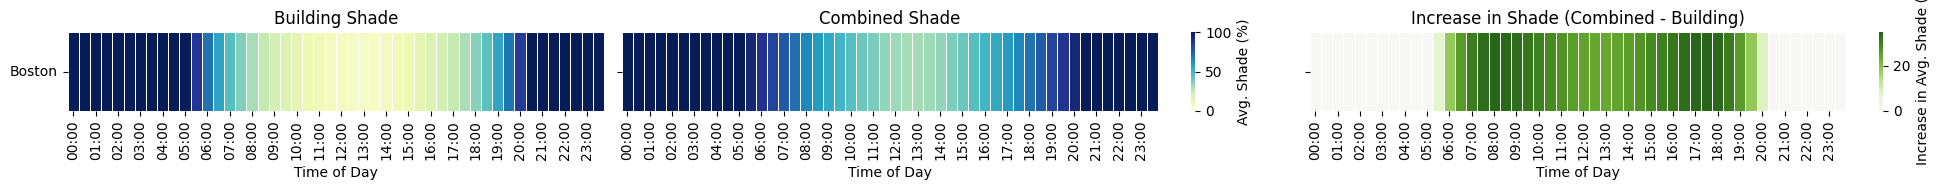

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the comparison cities
cities_to_compare = ["Boston"]

# cities_to_compare = ["Boston"]

# Filter the DataFrames to include only the comparison cities.
comparison_building = building_shade_df.loc[cities_to_compare]
comparison_tree = tree_shade_df.loc[cities_to_compare]

# Compute the difference between the filtered tree and building shade.
comparison_diff = comparison_tree - comparison_building

# Define a common scale for the building and combined shade heatmaps.
shade_vmin = 0
shade_vmax = 100

# Create a figure with three subplots. Adjust width ratios as needed.
fig, axes = plt.subplots(1, 3, figsize=(20, 2), sharey=True, 
                           gridspec_kw={'width_ratios': [0.8, 1, 1]})

# Plot 1: Building shade heatmap (no colorbar)
sns.heatmap(
    comparison_building,
    ax=axes[0],
    cmap="YlGnBu",
    vmin=shade_vmin,
    vmax=shade_vmax,
    cbar=False,  # remove the colorbar here
    linewidths=0.5
)
axes[0].set_title("Building Shade")
# axes[0].set_ylabel("City")
axes[0].set_xlabel("Time of Day")

# Plot 2: Combined (Tree) shade heatmap (with colorbar)
sns.heatmap(
    comparison_tree,
    ax=axes[1],
    cmap="YlGnBu",
    vmin=shade_vmin,
    vmax=shade_vmax,
    cbar_kws={'label': 'Avg. Shade (%)'},
    linewidths=0.5
)
axes[1].set_title("Combined Shade")
axes[1].set_xlabel("Time of Day")

# Plot 3: Difference heatmap (with colorbar)
sns.heatmap(
    comparison_diff,
    ax=axes[2],
    cmap="PiYG",  # diverging colormap for differences
    center=0,         # center the colormap at 0 for the difference plot
    cbar_kws={'label': 'Increase in Avg. Shade (%)'},
    linewidths=0.5
)
axes[2].set_title("Increase in Shade (Combined - Building)")
axes[2].set_xlabel("Time of Day")

for ax in axes:
    ax.tick_params(axis='y', labelrotation=0)

plt.tight_layout()
plt.show()

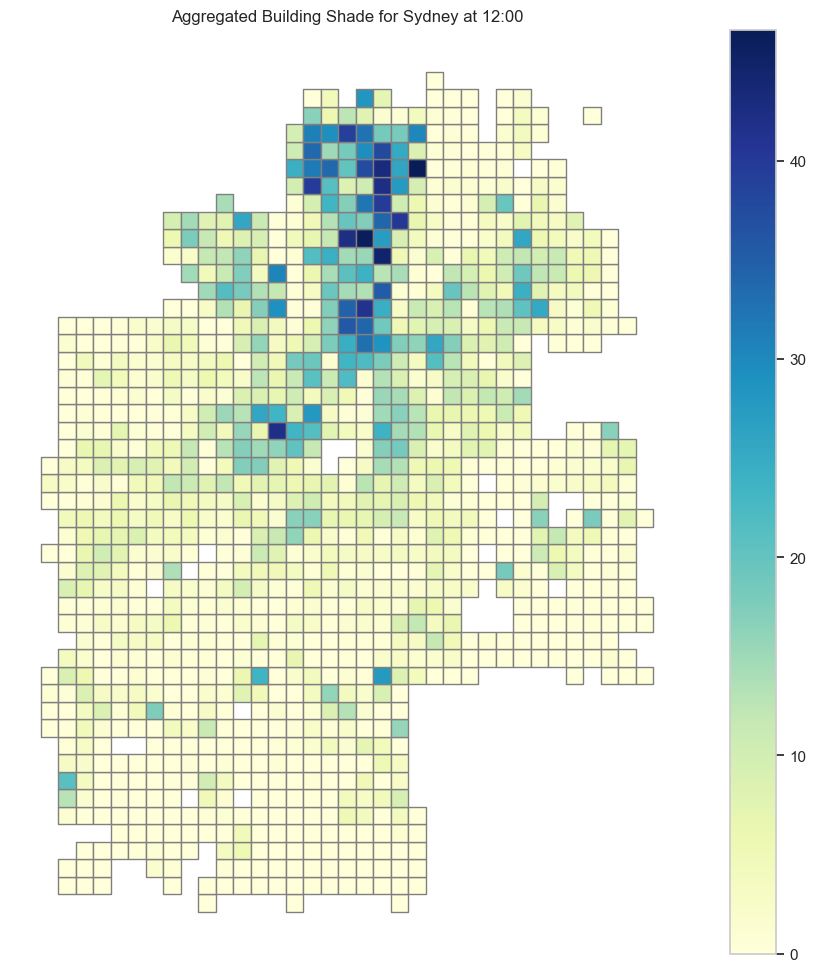

In [109]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box

# ---------------------------
# Step 1: Prepare the Data
# ---------------------------
# Suppose you have Sydney’s sidewalk GeoDataFrame already loaded:
sydney_gdf = combined_city_data["Sydney"]

# Define the date string and the corresponding shade column for 12:00.
date_str = city_details["Sydney"]["date"].replace("-", "")  # e.g., "20251221"
shade_column = f"{date_str}_building_shade_percent_at_1200"   # change to tree shade if needed

# Check that the column exists.
if shade_column not in sydney_gdf.columns:
    raise ValueError(f"Column {shade_column} not found in the Sydney data.")

# Create a new column called "shade_value" for clarity.
sydney_gdf = sydney_gdf.copy()
sydney_gdf["shade_value"] = sydney_gdf[shade_column]

# Ensure the GeoDataFrame is in a projected CRS for accurate distance measurements.
# If it’s still in a geographic CRS, reproject it (example uses a UTM zone for Sydney).
if sydney_gdf.crs.is_geographic:
    # EPSG:28356 (GDA94 / MGA zone 56) is common for Sydney—adjust as needed.
    sydney_gdf = sydney_gdf.to_crs(epsg=28356)

# ---------------------------
# Step 2: Create a Grid
# ---------------------------
def create_grid(gdf, cell_size):
    """
    Create a grid (as a GeoDataFrame) covering the extent of gdf,
    with square cells of size cell_size (in the units of gdf's CRS).
    """
    xmin, ymin, xmax, ymax = gdf.total_bounds
    cols = int(np.ceil((xmax - xmin) / cell_size))
    rows = int(np.ceil((ymax - ymin) / cell_size))
    
    grid_cells = []
    for i in range(cols):
        for j in range(rows):
            cell = box(xmin + i * cell_size, 
                       ymin + j * cell_size, 
                       xmin + (i + 1) * cell_size, 
                       ymin + (j + 1) * cell_size)
            grid_cells.append(cell)
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)
    return grid

# Choose an appropriate cell size (e.g., 50 meters) for the aggregation.
cell_size = 150  # adjust based on your data scale
grid = create_grid(sydney_gdf, cell_size)

# ---------------------------
# Step 3: Spatially Aggregate Shade Data
# ---------------------------
# Spatially join the sidewalk polygons to the grid cells.
# Each sidewalk polygon gets assigned to the grid cell(s) it intersects.
joined = gpd.sjoin(sydney_gdf, grid, how="inner", predicate="intersects")

# Compute the average shade value for each grid cell.
# 'index_right' refers to the grid cell index from the join.
grid_avg = joined.groupby("index_right")["shade_value"].mean()

# Map the aggregated values back onto the grid.
grid["avg_shade"] = grid.index.map(grid_avg)

# ---------------------------
# Step 4: Plot the Aggregated Grid
# ---------------------------
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
grid.plot(column="avg_shade", cmap="YlGnBu", legend=True, ax=ax, edgecolor="grey")
ax.set_title("Aggregated Building Shade for Sydney at 12:00")
ax.set_axis_off()  # Optional: turn off axis if desired
plt.show()

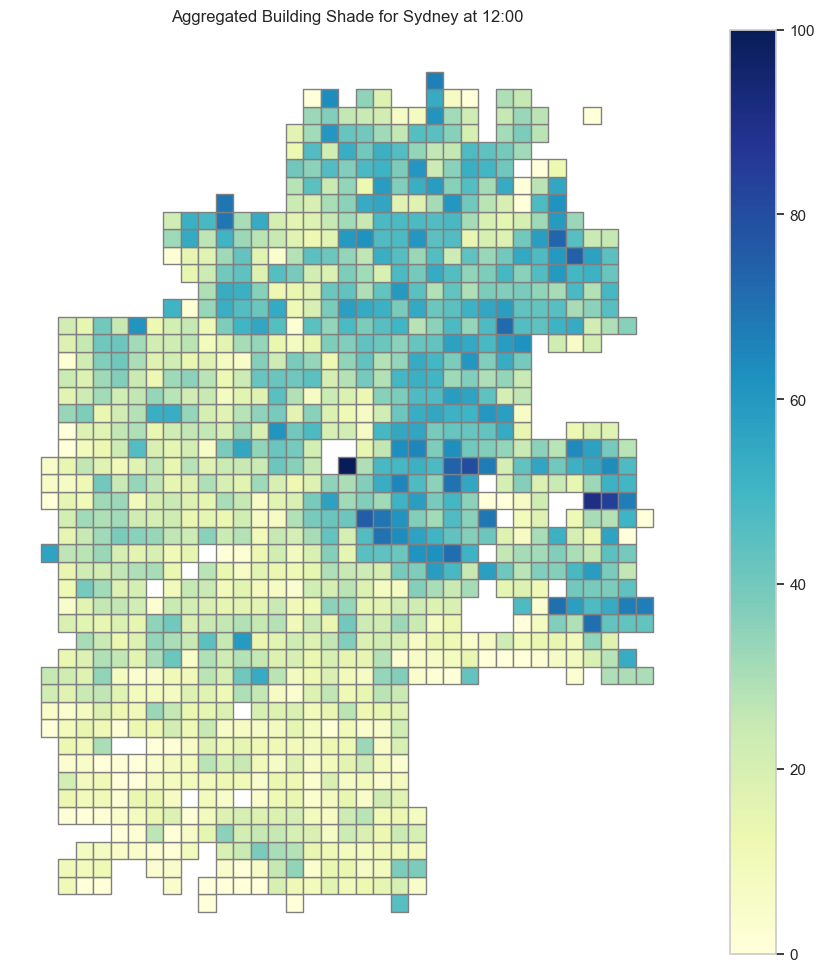

In [110]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box

# ---------------------------
# Step 1: Prepare the Data
# ---------------------------
# Suppose you have Sydney’s sidewalk GeoDataFrame already loaded:
sydney_gdf = combined_city_data["Sydney"]

# Define the date string and the corresponding shade column for 12:00.
date_str = city_details["Sydney"]["date"].replace("-", "")  # e.g., "20251221"
shade_column = f"{date_str}_tree_shade_percent_at_1200"   # change to tree shade if needed

# Check that the column exists.
if shade_column not in sydney_gdf.columns:
    raise ValueError(f"Column {shade_column} not found in the Sydney data.")

# Create a new column called "shade_value" for clarity.
sydney_gdf = sydney_gdf.copy()
sydney_gdf["shade_value"] = sydney_gdf[shade_column]

# Ensure the GeoDataFrame is in a projected CRS for accurate distance measurements.
# If it’s still in a geographic CRS, reproject it (example uses a UTM zone for Sydney).
if sydney_gdf.crs.is_geographic:
    # EPSG:28356 (GDA94 / MGA zone 56) is common for Sydney—adjust as needed.
    sydney_gdf = sydney_gdf.to_crs(epsg=28356)

# ---------------------------
# Step 2: Create a Grid
# ---------------------------
def create_grid(gdf, cell_size):
    """
    Create a grid (as a GeoDataFrame) covering the extent of gdf,
    with square cells of size cell_size (in the units of gdf's CRS).
    """
    xmin, ymin, xmax, ymax = gdf.total_bounds
    cols = int(np.ceil((xmax - xmin) / cell_size))
    rows = int(np.ceil((ymax - ymin) / cell_size))
    
    grid_cells = []
    for i in range(cols):
        for j in range(rows):
            cell = box(xmin + i * cell_size, 
                       ymin + j * cell_size, 
                       xmin + (i + 1) * cell_size, 
                       ymin + (j + 1) * cell_size)
            grid_cells.append(cell)
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)
    return grid

# Choose an appropriate cell size (e.g., 50 meters) for the aggregation.
cell_size = 150  # adjust based on your data scale
grid = create_grid(sydney_gdf, cell_size)

# ---------------------------
# Step 3: Spatially Aggregate Shade Data
# ---------------------------
# Spatially join the sidewalk polygons to the grid cells.
# Each sidewalk polygon gets assigned to the grid cell(s) it intersects.
joined = gpd.sjoin(sydney_gdf, grid, how="inner", predicate="intersects")

# Compute the average shade value for each grid cell.
# 'index_right' refers to the grid cell index from the join.
grid_avg = joined.groupby("index_right")["shade_value"].mean()

# Map the aggregated values back onto the grid.
grid["avg_shade"] = grid.index.map(grid_avg)

# ---------------------------
# Step 4: Plot the Aggregated Grid
# ---------------------------
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
grid.plot(column="avg_shade", cmap="YlGnBu", legend=True, ax=ax, edgecolor="grey")
ax.set_title("Aggregated Building Shade for Sydney at 12:00")
ax.set_axis_off()  # Optional: turn off axis if desired
plt.show()

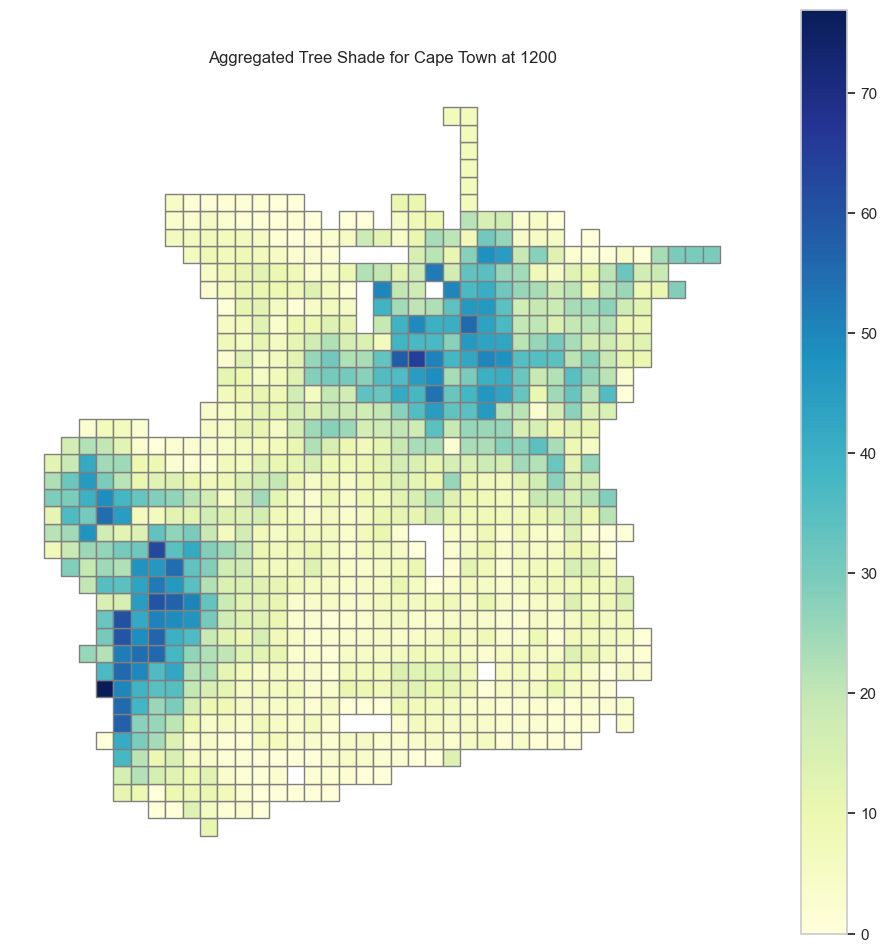

In [113]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box

def create_grid(gdf, cell_size):
    """
    Create a grid (as a GeoDataFrame) covering the extent of gdf,
    with square cells of size cell_size (in the units of gdf's CRS).
    """
    xmin, ymin, xmax, ymax = gdf.total_bounds
    cols = int(np.ceil((xmax - xmin) / cell_size))
    rows = int(np.ceil((ymax - ymin) / cell_size))
    
    grid_cells = []
    for i in range(cols):
        for j in range(rows):
            cell = box(xmin + i * cell_size, 
                       ymin + j * cell_size, 
                       xmin + (i + 1) * cell_size, 
                       ymin + (j + 1) * cell_size)
            grid_cells.append(cell)
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)
    return grid

def plot_shade_map(city, shade_type, time_str, cell_size):
    """
    Plot an aggregated shade map for a given city.
    
    Parameters:
    - city: Name of the city (must be a key in combined_city_data and city_details)
    - shade_type: Either "building" or "tree" (controls which shade column to use)
    - time_str: A string representing the time in HHMM format (e.g., "1200")
    - cell_size: The grid cell size (in the units of the city's projected CRS)
    """
    # Retrieve the city's sidewalk GeoDataFrame and details.
    if city not in combined_city_data:
        raise ValueError(f"City '{city}' not found in combined_city_data.")
    city_gdf = combined_city_data[city]
    
    if city not in city_details:
        raise ValueError(f"City '{city}' not found in city_details.")
    date_str = city_details[city]["date"].replace("-", "")  # e.g., "20251221"
    
    # Construct the appropriate shade column name.
    shade_column = f"{date_str}_{shade_type}_shade_percent_at_{time_str}"
    if shade_column not in city_gdf.columns:
        raise ValueError(f"Column '{shade_column}' not found in the {city} data.")
    
    # Work on a copy of the data and create a uniform column for the shade value.
    city_gdf = city_gdf.copy()
    city_gdf["shade_value"] = city_gdf[shade_column]
    
    # Reproject to a projected CRS if necessary so that our cell_size is meaningful.
    if city_gdf.crs.is_geographic:
        # For simplicity, we use Web Mercator (EPSG:3857). You may choose a more appropriate projection.
        city_gdf = city_gdf.to_crs(epsg=3857)
    
    # Create a grid covering the extent of the city's sidewalk data.
    grid = create_grid(city_gdf, cell_size)
    
    # Spatially join the sidewalk polygons with the grid.
    joined = gpd.sjoin(city_gdf, grid, how="inner", predicate="intersects")
    
    # For each grid cell, compute the average shade value.
    grid_avg = joined.groupby("index_right")["shade_value"].mean()
    
    # Map the aggregated values back onto the grid GeoDataFrame.
    grid["avg_shade"] = grid.index.map(grid_avg)
    
    # Plot the aggregated grid as a heatmap.
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    grid.plot(column="avg_shade", cmap="YlGnBu", legend=True, ax=ax, edgecolor="grey")
    ax.set_title(f"Aggregated {shade_type.capitalize()} Shade for {city} at {time_str}")
    ax.set_axis_off()  # Optionally hide the axis for a cleaner look.
    plt.show()

# Example usage:
# To generate a map for Sydney, showing the tree shade at 12:00 using a 150-meter grid:
plot_shade_map(city="Cape Town", shade_type="tree", time_str="1200", cell_size=1000)

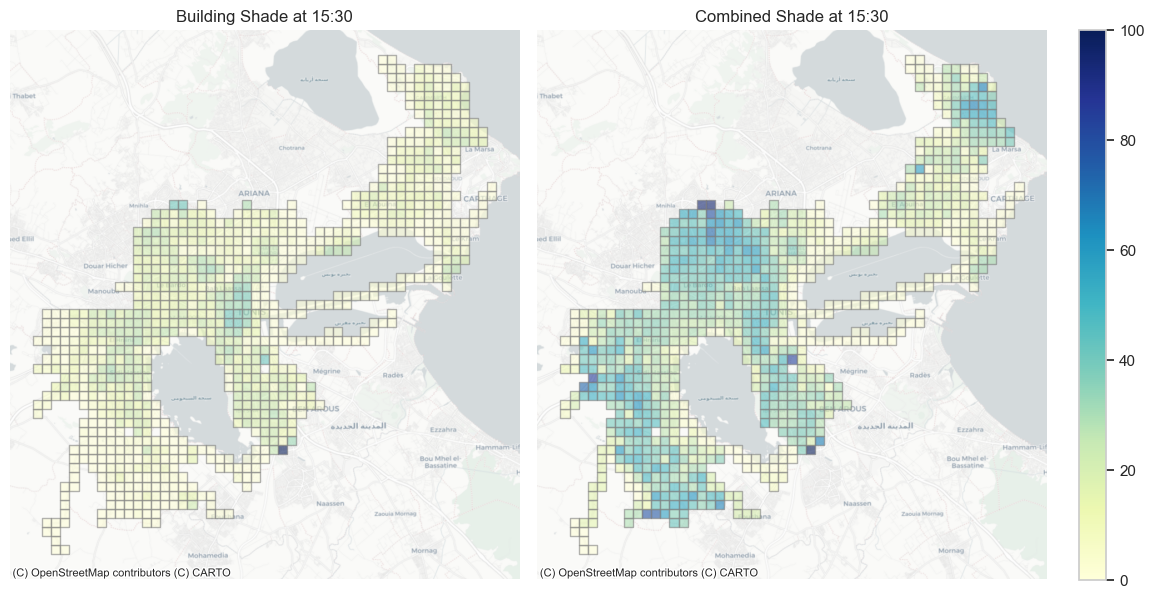

In [13]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import contextily as ctx  # Import contextily for basemaps

def create_grid(gdf, cell_size):
    """
    Create a grid (as a GeoDataFrame) covering the extent of gdf,
    with square cells of size cell_size (in the units of gdf's CRS).
    """
    xmin, ymin, xmax, ymax = gdf.total_bounds
    cols = int(np.ceil((xmax - xmin) / cell_size))
    rows = int(np.ceil((ymax - ymin) / cell_size))
    
    grid_cells = []
    for i in range(cols):
        for j in range(rows):
            cell = box(
                xmin + i * cell_size, 
                ymin + j * cell_size, 
                xmin + (i + 1) * cell_size, 
                ymin + (j + 1) * cell_size
            )
            grid_cells.append(cell)
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)
    return grid

def aggregate_shade_grid(gdf, shade_column, cell_size):
    """
    Aggregate the shade values from the given GeoDataFrame onto a grid.
    
    Parameters:
    - gdf: The GeoDataFrame with sidewalk polygons.
    - shade_column: The column name (string) containing the shade percentage.
    - cell_size: The grid cell size (in the units of the gdf's CRS).
    
    Returns:
    - grid: A GeoDataFrame containing the grid cells with an added column 'avg_shade'.
    """
    gdf_copy = gdf.copy()
    gdf_copy["shade_value"] = gdf_copy[shade_column]
    
    # Ensure data is in a projected CRS so that cell_size is meaningful.
    if gdf_copy.crs.is_geographic:
        # Using Web Mercator (EPSG:3857) for simplicity—choose an appropriate projection if needed.
        gdf_copy = gdf_copy.to_crs(epsg=3857)
    
    grid = create_grid(gdf_copy, cell_size)
    joined = gpd.sjoin(gdf_copy, grid, how="inner", predicate="intersects")
    grid_avg = joined.groupby("index_right")["shade_value"].mean()
    grid["avg_shade"] = grid.index.map(grid_avg)
    return grid

def plot_dual_shade_maps(city, time_str, cell_size, add_basemap=True):
    """
    Create side-by-side aggregated shade maps for a given city and time.
    
    This function plots two maps:
      - Left: Aggregated building shade (colorbar removed).
      - Right: Aggregated combined (tree) shade (colorbar displayed).
    
    Both maps are produced using the same color scale (0 to 100) and, optionally,
    include a basemap from Contextily (CartoDB DarkMatter).
    
    Parameters:
    - city: Name of the city (must be a key in combined_city_data and city_details).
    - time_str: A string representing the time in HHMM format (e.g., "1200").
    - cell_size: The grid cell size (in the units of the city's projected CRS).
    - add_basemap: Boolean flag. If True, adds a Contextily basemap to each subplot.
    """
    # Retrieve the city's sidewalk GeoDataFrame.
    if city not in combined_city_data:
        raise ValueError(f"City '{city}' not found in combined_city_data.")
    city_gdf = combined_city_data[city]
    
    # Retrieve the city's details.
    if city not in city_details:
        raise ValueError(f"City '{city}' not found in city_details.")
    date_str = city_details[city]["date"].replace("-", "")  # e.g., "20251221"
    
    # Construct the column names for building shade and tree shade.
    building_shade_column = f"{date_str}_building_shade_percent_at_{time_str}"
    tree_shade_column = f"{date_str}_tree_shade_percent_at_{time_str}"
    
    if building_shade_column not in city_gdf.columns:
        raise ValueError(f"Column '{building_shade_column}' not found in {city} data.")
    if tree_shade_column not in city_gdf.columns:
        raise ValueError(f"Column '{tree_shade_column}' not found in {city} data.")
    
    # Aggregate the data for both shade types.
    grid_building = aggregate_shade_grid(city_gdf, building_shade_column, cell_size)
    grid_tree = aggregate_shade_grid(city_gdf, tree_shade_column, cell_size)
    
    # Create a formatted timestring
    formatted_time = f"{time_str[:2]}:{time_str[2:]}"


    # Create a figure with two subplots (side by side - 12, 6 is the original).
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [0.8, 1]})
    
    # Plot the building shade map (without colorbar).
    grid_building.plot(
        column="avg_shade", cmap="YlGnBu", legend=False, ax=axes[0],
        edgecolor="grey", vmin=0, vmax=100, alpha=0.6
    )
    axes[0].set_title(f"Building Shade at {formatted_time}")
    axes[0].set_axis_off()
    
    # Optionally add a basemap to the left plot.
    if add_basemap:
        ctx.add_basemap(axes[0], source=ctx.providers.CartoDB.Positron, crs=grid_building.crs)
    
    # Plot the tree (combined) shade map (with colorbar).
    grid_tree.plot(
        column="avg_shade", cmap="YlGnBu", legend=True, ax=axes[1],
        edgecolor="grey", vmin=0, vmax=100, alpha=0.6
    )
    axes[1].set_title(f"Combined Shade at {formatted_time}")
    axes[1].set_axis_off()
    
    # Optionally add a basemap to the right plot.
    if add_basemap:
        ctx.add_basemap(axes[1], source=ctx.providers.CartoDB.Positron, crs=grid_tree.crs)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# This will generate two side-by-side maps for Sydney at 12:00 using a 150-meter grid cell size.
# Set add_basemap=False to disable the basemap.
plot_dual_shade_maps(city="Tunis", time_str="1530", cell_size=500, add_basemap=True)

## City Pairs

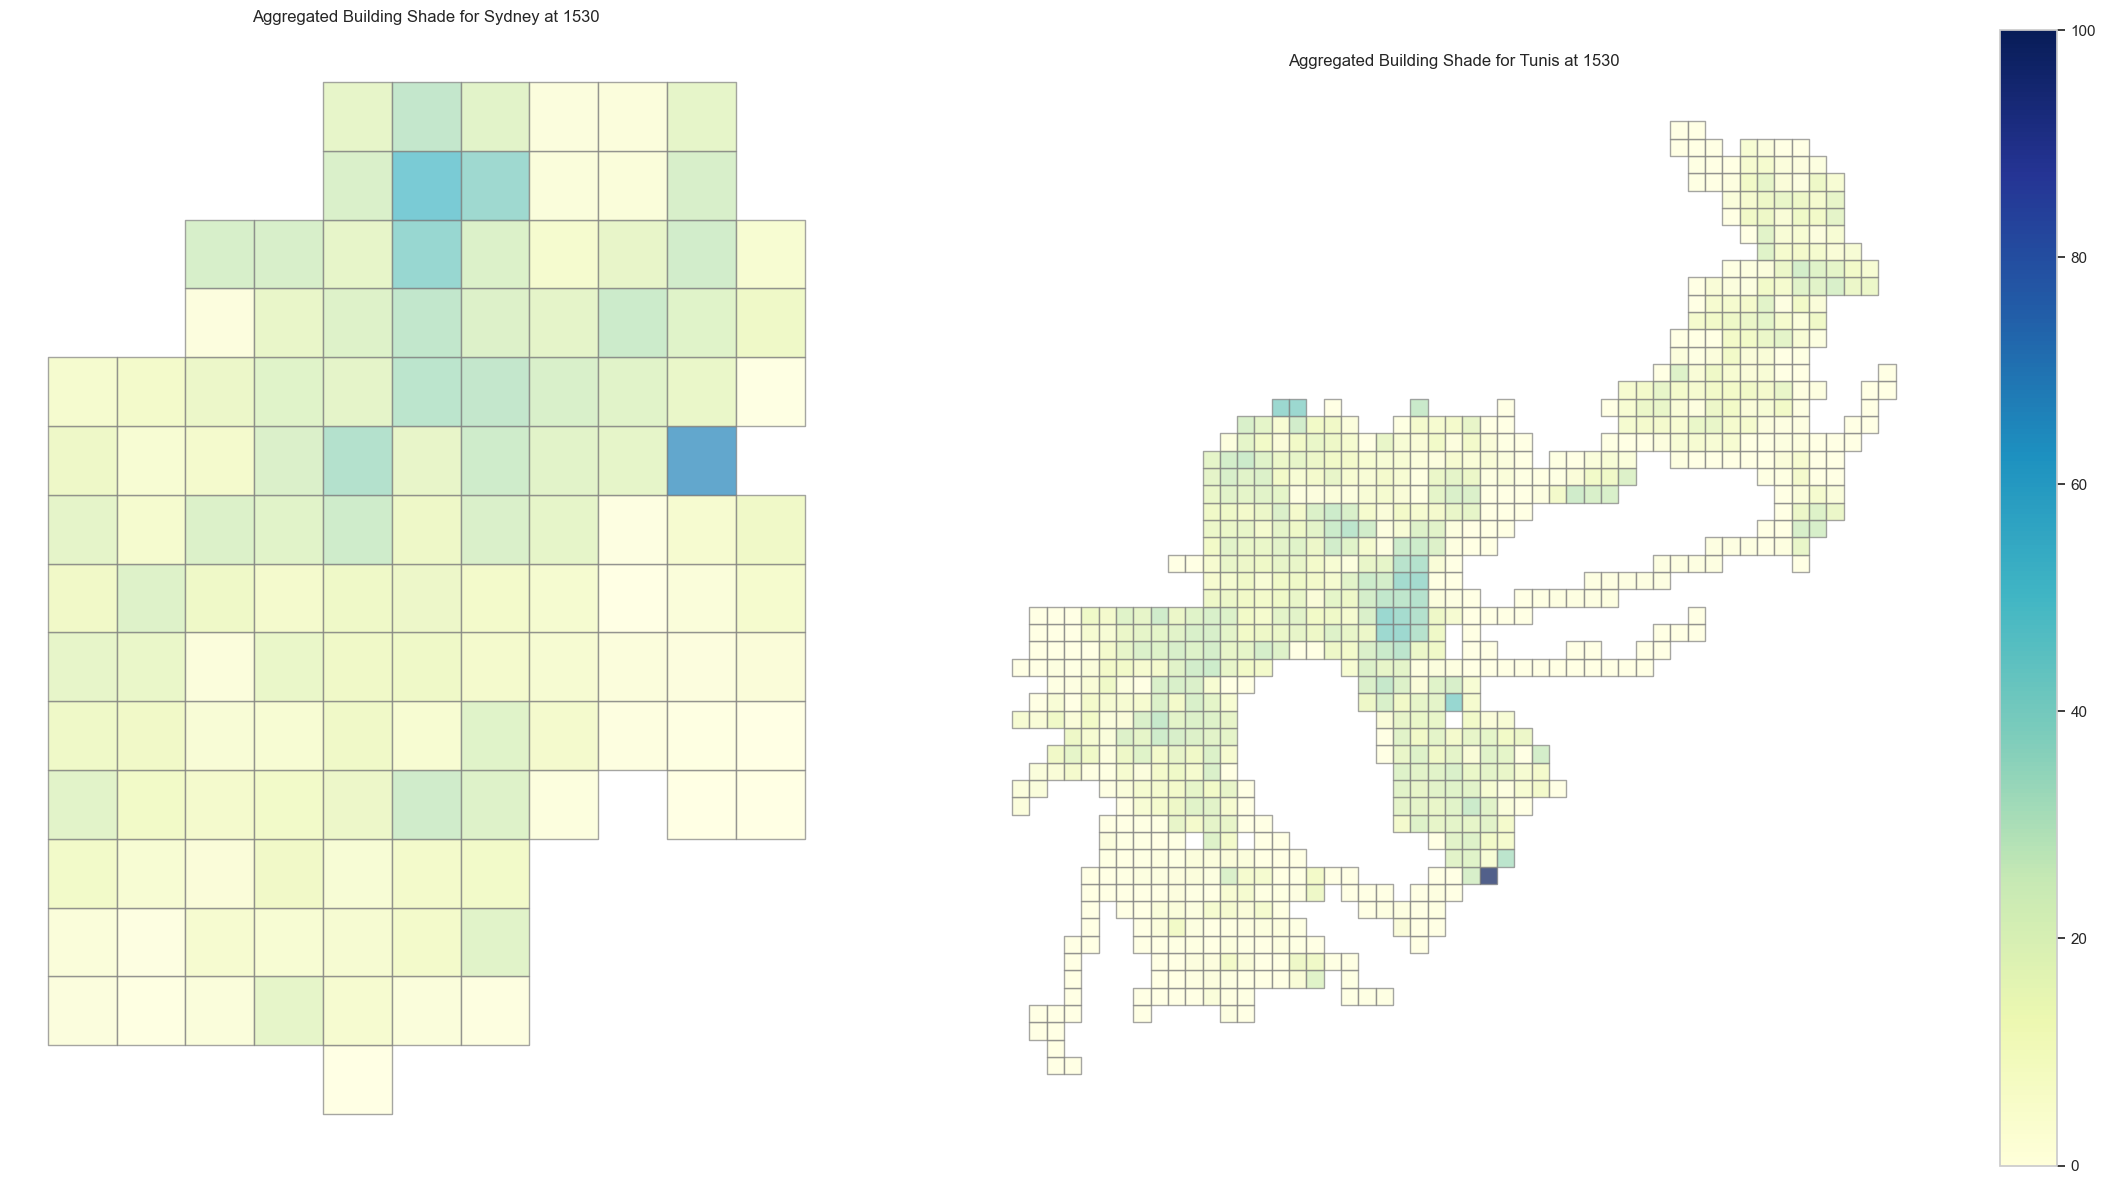

In [14]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import contextily as ctx  # Import contextily for basemaps

def create_grid(gdf, cell_size):
    """
    Create a grid (as a GeoDataFrame) covering the extent of gdf,
    with square cells of size cell_size (in the units of gdf's CRS).
    """
    xmin, ymin, xmax, ymax = gdf.total_bounds
    cols = int(np.ceil((xmax - xmin) / cell_size))
    rows = int(np.ceil((ymax - ymin) / cell_size))
    
    grid_cells = []
    for i in range(cols):
        for j in range(rows):
            cell = box(
                xmin + i * cell_size, 
                ymin + j * cell_size, 
                xmin + (i + 1) * cell_size, 
                ymin + (j + 1) * cell_size
            )
            grid_cells.append(cell)
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)
    return grid

def aggregate_shade_grid(gdf, shade_column, cell_size):
    """
    Aggregate the shade values from the given GeoDataFrame onto a grid.
    
    Parameters:
    - gdf: The GeoDataFrame with sidewalk polygons.
    - shade_column: The column name (string) containing the shade percentage.
    - cell_size: The grid cell size (in the units of the gdf's CRS).
    
    Returns:
    - grid: A GeoDataFrame containing the grid cells with an added column 'avg_shade'.
    """
    gdf_copy = gdf.copy()
    gdf_copy["shade_value"] = gdf_copy[shade_column]
    
    # Ensure data is in a projected CRS so that cell_size is meaningful.
    if gdf_copy.crs.is_geographic:
        # Using Web Mercator (EPSG:3857) for simplicity—choose an appropriate projection if needed.
        gdf_copy = gdf_copy.to_crs(epsg=3857)
    
    grid = create_grid(gdf_copy, cell_size)
    joined = gpd.sjoin(gdf_copy, grid, how="inner", predicate="intersects")
    grid_avg = joined.groupby("index_right")["shade_value"].mean()
    grid["avg_shade"] = grid.index.map(grid_avg)
    return grid

def plot_comparison_shade_maps(city1, city2, shade_type, time_str, cell_size, add_basemap=True):
    """
    Create side-by-side aggregated shade maps for two different cities.
    
    This function compares the selected shade type ("building" or "tree")
    for two cities at a given time (HHMM format) using the same color scale (0 to 100).
    An optional basemap (using Contextily) can be added.
    
    Parameters:
    - city1: Name of the first city (must be a key in combined_city_data and city_details).
    - city2: Name of the second city.
    - shade_type: Either "building" or "tree" (determines which shade column to use).
    - time_str: A string representing the time in HHMM format (e.g., "1200").
    - cell_size: The grid cell size (in the units of the city's projected CRS).
    - add_basemap: Boolean flag; if True, a basemap is added to each subplot.
    """
    # Retrieve and validate data for the first city.
    if city1 not in combined_city_data:
        raise ValueError(f"City '{city1}' not found in combined_city_data.")
    city1_gdf = combined_city_data[city1]
    if city1 not in city_details:
        raise ValueError(f"City '{city1}' not found in city_details.")
    date_str1 = city_details[city1]["date"].replace("-", "")
    shade_column1 = f"{date_str1}_{shade_type}_shade_percent_at_{time_str}"
    if shade_column1 not in city1_gdf.columns:
        raise ValueError(f"Column '{shade_column1}' not found in {city1} data.")
    
    # Retrieve and validate data for the second city.
    if city2 not in combined_city_data:
        raise ValueError(f"City '{city2}' not found in combined_city_data.")
    city2_gdf = combined_city_data[city2]
    if city2 not in city_details:
        raise ValueError(f"City '{city2}' not found in city_details.")
    date_str2 = city_details[city2]["date"].replace("-", "")
    shade_column2 = f"{date_str2}_{shade_type}_shade_percent_at_{time_str}"
    if shade_column2 not in city2_gdf.columns:
        raise ValueError(f"Column '{shade_column2}' not found in {city2} data.")
    
    # Aggregate the shade data for both cities.
    grid1 = aggregate_shade_grid(city1_gdf, shade_column1, cell_size)
    grid2 = aggregate_shade_grid(city2_gdf, shade_column2, cell_size)
    
    # Create a figure with two subplots.
    fig, axes = plt.subplots(1, 2, figsize=(24, 12))
    
    # Plot the first city's aggregated shade map (no colorbar).
    grid1.plot(
        column="avg_shade", cmap="YlGnBu", legend=False, ax=axes[0],
        edgecolor="grey", vmin=0, vmax=100, alpha=0.7
    )
    axes[0].set_title(f"Aggregated {shade_type.capitalize()} Shade for {city1} at {time_str}")
    axes[0].set_axis_off()
    if add_basemap:
        ctx.add_basemap(axes[0], source=ctx.providers.CartoDB.DarkMatter, crs=grid1.crs)
    
    # Plot the second city's aggregated shade map (with colorbar).
    grid2.plot(
        column="avg_shade", cmap="YlGnBu", legend=True, ax=axes[1],
        edgecolor="grey", vmin=0, vmax=100, alpha=0.7
    )
    axes[1].set_title(f"Aggregated {shade_type.capitalize()} Shade for {city2} at {time_str}")
    axes[1].set_axis_off()
    if add_basemap:
        ctx.add_basemap(axes[1], source=ctx.providers.CartoDB.DarkMatter, crs=grid2.crs)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# This will generate side-by-side maps comparing Sydney and Cape Town
# for building shade at 12:00 using a 150-meter grid cell size.
plot_comparison_shade_maps(city1="Sydney", city2="Tunis", shade_type="building", time_str="1530", cell_size=500, add_basemap=False)

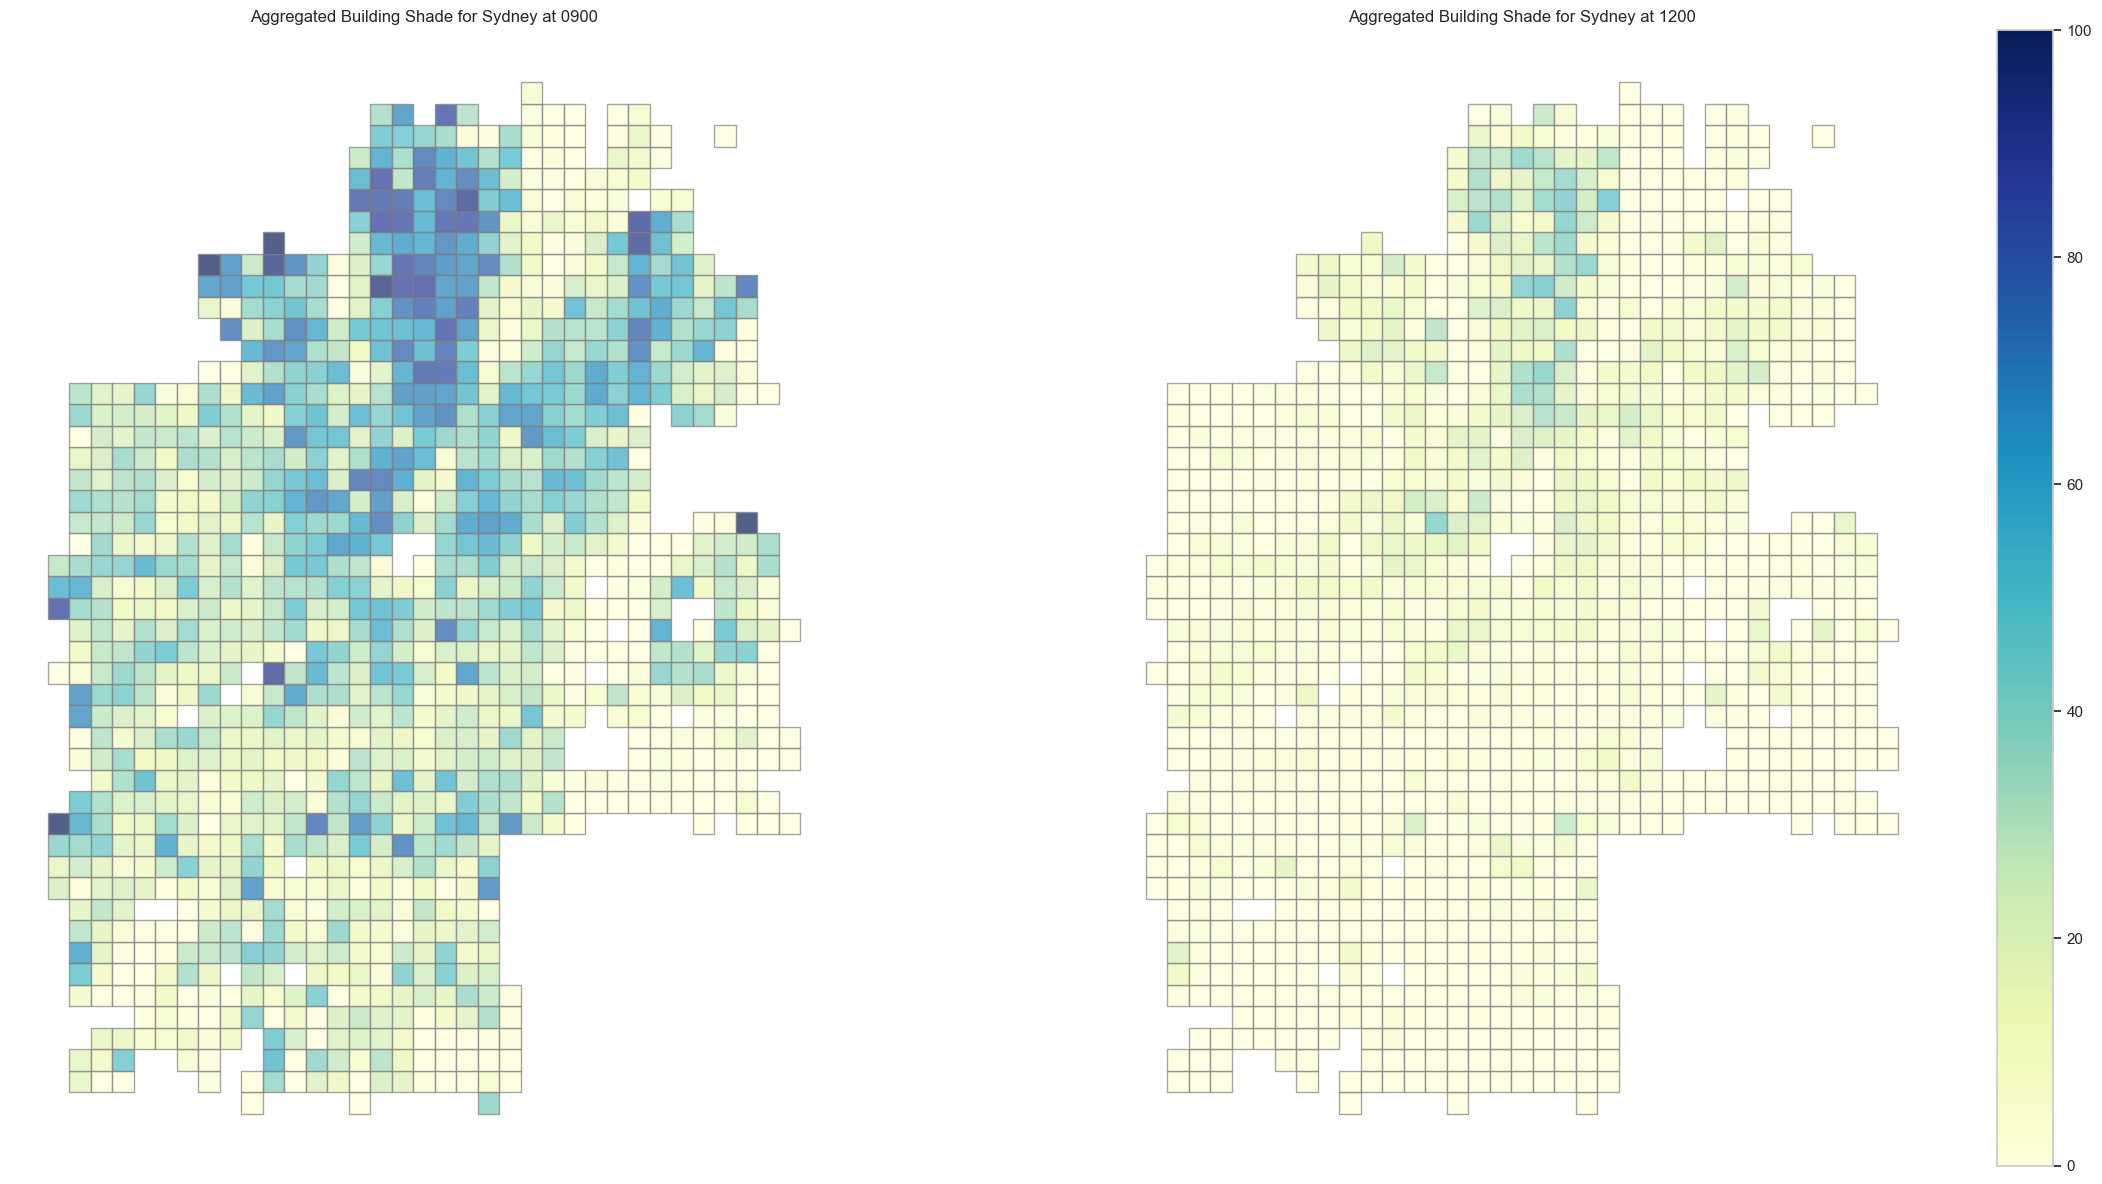

In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import contextily as ctx  # Import contextily for basemaps

def create_grid(gdf, cell_size):
    """
    Create a grid (as a GeoDataFrame) covering the extent of gdf,
    with square cells of size cell_size (in the units of gdf's CRS).
    """
    xmin, ymin, xmax, ymax = gdf.total_bounds
    cols = int(np.ceil((xmax - xmin) / cell_size))
    rows = int(np.ceil((ymax - ymin) / cell_size))
    
    grid_cells = []
    for i in range(cols):
        for j in range(rows):
            cell = box(
                xmin + i * cell_size, 
                ymin + j * cell_size, 
                xmin + (i + 1) * cell_size, 
                ymin + (j + 1) * cell_size
            )
            grid_cells.append(cell)
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)
    return grid

def aggregate_shade_grid(gdf, shade_column, cell_size):
    """
    Aggregate the shade values from the given GeoDataFrame onto a grid.
    
    Parameters:
    - gdf: The GeoDataFrame with sidewalk polygons.
    - shade_column: The column name (string) containing the shade percentage.
    - cell_size: The grid cell size (in the units of the gdf's CRS).
    
    Returns:
    - grid: A GeoDataFrame containing the grid cells with an added column 'avg_shade'.
    """
    gdf_copy = gdf.copy()
    gdf_copy["shade_value"] = gdf_copy[shade_column]
    
    # Ensure data is in a projected CRS so that cell_size is meaningful.
    if gdf_copy.crs.is_geographic:
        # Using Web Mercator (EPSG:3857) for simplicity—choose an appropriate projection if needed.
        gdf_copy = gdf_copy.to_crs(epsg=3857)
    
    grid = create_grid(gdf_copy, cell_size)
    joined = gpd.sjoin(gdf_copy, grid, how="inner", predicate="intersects")
    grid_avg = joined.groupby("index_right")["shade_value"].mean()
    grid["avg_shade"] = grid.index.map(grid_avg)
    return grid

def plot_temporal_comparison_shade_maps(city, shade_type, time_str1, time_str2, cell_size, add_basemap=True):
    """
    Create side-by-side aggregated shade maps for a given city, comparing two timestamps.
    
    This function plots two maps for the same city and shade type (either "building" or "tree")
    at two different timestamps. Both maps use the same color scale (0 to 100) and optionally include
    a basemap from Contextily.
    
    Parameters:
    - city: Name of the city (must be a key in combined_city_data and city_details).
    - shade_type: Either "building" or "tree" (determines which shade column to use).
    - time_str1: A string representing the first time in HHMM format (e.g., "1200").
    - time_str2: A string representing the second time in HHMM format (e.g., "1500").
    - cell_size: The grid cell size (in the units of the city's projected CRS).
    - add_basemap: Boolean flag; if True, a basemap is added to each subplot.
    """
    # Retrieve the city's sidewalk GeoDataFrame.
    if city not in combined_city_data:
        raise ValueError(f"City '{city}' not found in combined_city_data.")
    city_gdf = combined_city_data[city]
    
    # Retrieve the city's details.
    if city not in city_details:
        raise ValueError(f"City '{city}' not found in city_details.")
    date_str = city_details[city]["date"].replace("-", "")  # e.g., "20251221"
    
    # Construct the column names for the two timestamps.
    shade_column1 = f"{date_str}_{shade_type}_shade_percent_at_{time_str1}"
    shade_column2 = f"{date_str}_{shade_type}_shade_percent_at_{time_str2}"
    
    if shade_column1 not in city_gdf.columns:
        raise ValueError(f"Column '{shade_column1}' not found in {city} data.")
    if shade_column2 not in city_gdf.columns:
        raise ValueError(f"Column '{shade_column2}' not found in {city} data.")
    
    # Aggregate the shade data for each timestamp.
    grid1 = aggregate_shade_grid(city_gdf, shade_column1, cell_size)
    grid2 = aggregate_shade_grid(city_gdf, shade_column2, cell_size)
    
    # Create a figure with two subplots.
    fig, axes = plt.subplots(1, 2, figsize=(24, 12))
    
    # Plot the first timestamp's aggregated shade map (without colorbar).
    grid1.plot(
        column="avg_shade", cmap="YlGnBu", legend=False, ax=axes[0],
        edgecolor="grey", vmin=0, vmax=100, alpha=0.7
    )
    axes[0].set_title(f"Aggregated {shade_type.capitalize()} Shade for {city} at {time_str1}")
    axes[0].set_axis_off()
    if add_basemap:
        ctx.add_basemap(axes[0], source=ctx.providers.CartoDB.DarkMatter, crs=grid1.crs)
    
    # Plot the second timestamp's aggregated shade map (with colorbar).
    grid2.plot(
        column="avg_shade", cmap="YlGnBu", legend=True, ax=axes[1],
        edgecolor="grey", vmin=0, vmax=100, alpha=0.7
    )
    axes[1].set_title(f"Aggregated {shade_type.capitalize()} Shade for {city} at {time_str2}")
    axes[1].set_axis_off()
    if add_basemap:
        ctx.add_basemap(axes[1], source=ctx.providers.CartoDB.DarkMatter, crs=grid2.crs)
    
    plt.tight_layout()
    plt.show()

# Example usage:b
# This will generate side-by-side maps for Sydney comparing building shade at 12:00 vs 15:00
# using a 150-meter grid cell size. Set add_basemap=False to disable the basemap.
plot_temporal_comparison_shade_maps(city="Sydney", shade_type="building", 
                                    time_str1="0900", time_str2="1200", cell_size=150, 
                                    add_basemap=False)

In [27]:
import math
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import contextily as ctx  # Import contextily for basemaps

def create_grid(gdf, cell_size):
    """
    Create a grid (as a GeoDataFrame) covering the extent of gdf,
    with square cells of size cell_size (in the units of gdf's CRS).
    """
    xmin, ymin, xmax, ymax = gdf.total_bounds
    cols = int(np.ceil((xmax - xmin) / cell_size))
    rows = int(np.ceil((ymax - ymin) / cell_size))
    
    grid_cells = []
    for i in range(cols):
        for j in range(rows):
            cell = box(
                xmin + i * cell_size, 
                ymin + j * cell_size, 
                xmin + (i + 1) * cell_size, 
                ymin + (j + 1) * cell_size
            )
            grid_cells.append(cell)
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)
    return grid

def aggregate_shade_grid(gdf, shade_column, cell_size):
    """
    Aggregate the shade values from the given GeoDataFrame onto a grid.
    
    Parameters:
    - gdf: The GeoDataFrame with sidewalk polygons.
    - shade_column: The column name (string) containing the shade percentage.
    - cell_size: The grid cell size (in the units of the gdf's CRS).
    
    Returns:
    - grid: A GeoDataFrame containing the grid cells with an added column 'avg_shade'.
    """
    gdf_copy = gdf.copy()
    gdf_copy["shade_value"] = gdf_copy[shade_column]
    
    # Ensure data is in a projected CRS so that cell_size is meaningful.
    if gdf_copy.crs.is_geographic:
        # Using Web Mercator (EPSG:3857) for simplicity—choose an appropriate projection if needed.
        gdf_copy = gdf_copy.to_crs(epsg=3857)
    
    grid = create_grid(gdf_copy, cell_size)
    joined = gpd.sjoin(gdf_copy, grid, how="inner", predicate="intersects")
    grid_avg = joined.groupby("index_right")["shade_value"].mean()
    grid["avg_shade"] = grid.index.map(grid_avg)
    return grid

def plot_overview_shade_patterns(city, shade_type, time_steps, cell_size, add_basemap=True):
    """
    Create an overview plot showing aggregated shade maps for a given city over multiple timesteps.
    
    Parameters:
    - city: Name of the city (must be a key in combined_city_data and city_details).
    - shade_type: Either "building" or "tree" (determines which shade column to use).
    - time_steps: List of time strings in HHMM format (e.g., ["0900", "1200", "1500", "1800", "2100", "0000"]).
    - cell_size: The grid cell size (in the units of the city's projected CRS).
    - add_basemap: Boolean flag; if True, adds a Contextily basemap to each subplot.
    
    The function arranges the maps in 2 rows. For example, 6 timesteps will produce 2 rows with 3 columns,
    and 8 timesteps will produce 2 rows with 4 columns.
    """
    # Validate city existence
    if city not in combined_city_data:
        raise ValueError(f"City '{city}' not found in combined_city_data.")
    city_gdf = combined_city_data[city]
    if city not in city_details:
        raise ValueError(f"City '{city}' not found in city_details.")
    date_str = city_details[city]["date"].replace("-", "")  # e.g., "20251221"
    
    n_time = len(time_steps)
    nrows = 2
    ncols = math.ceil(n_time / nrows)
    
    # Create the subplot grid.
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 8))
    # Flatten the array for easy iteration.
    axes = axes.flatten()
    
    for i, time_str in enumerate(time_steps):
        # Construct the shade column name.
        shade_column = f"{date_str}_{shade_type}_shade_percent_at_{time_str}"
        if shade_column not in city_gdf.columns:
            raise ValueError(f"Column '{shade_column}' not found in {city} data.")
        # Aggregate the shade data.
        grid = aggregate_shade_grid(city_gdf, shade_column, cell_size)
        ax = axes[i]
        grid.plot(
            column="avg_shade", cmap="YlGnBu", legend=False, ax=ax,
            edgecolor="grey", vmin=0, vmax=100, alpha=0.7
        )
        ax.set_title(f"{city} {shade_type.capitalize()} Shade at {time_str}")
        ax.set_axis_off()
        if add_basemap:
            ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter, crs=grid.crs)
    
    # Turn off any unused axes.
    for j in range(n_time, len(axes)):
        axes[j].axis("off")
    
    plt.tight_layout()
    plt.show()

# Example usage:
# # This will create an overview plot for Stockholm showing 6 timesteps arranged in 2 rows and 3 columns.
# # You can change the time_steps list as needed.
# time_steps = ["0900", "1100", "1200", "1400", "1500", "1800"]
# plot_overview_shade_patterns(city="Sydney", shade_type="building", time_steps=time_steps, cell_size=200, add_basemap=False)

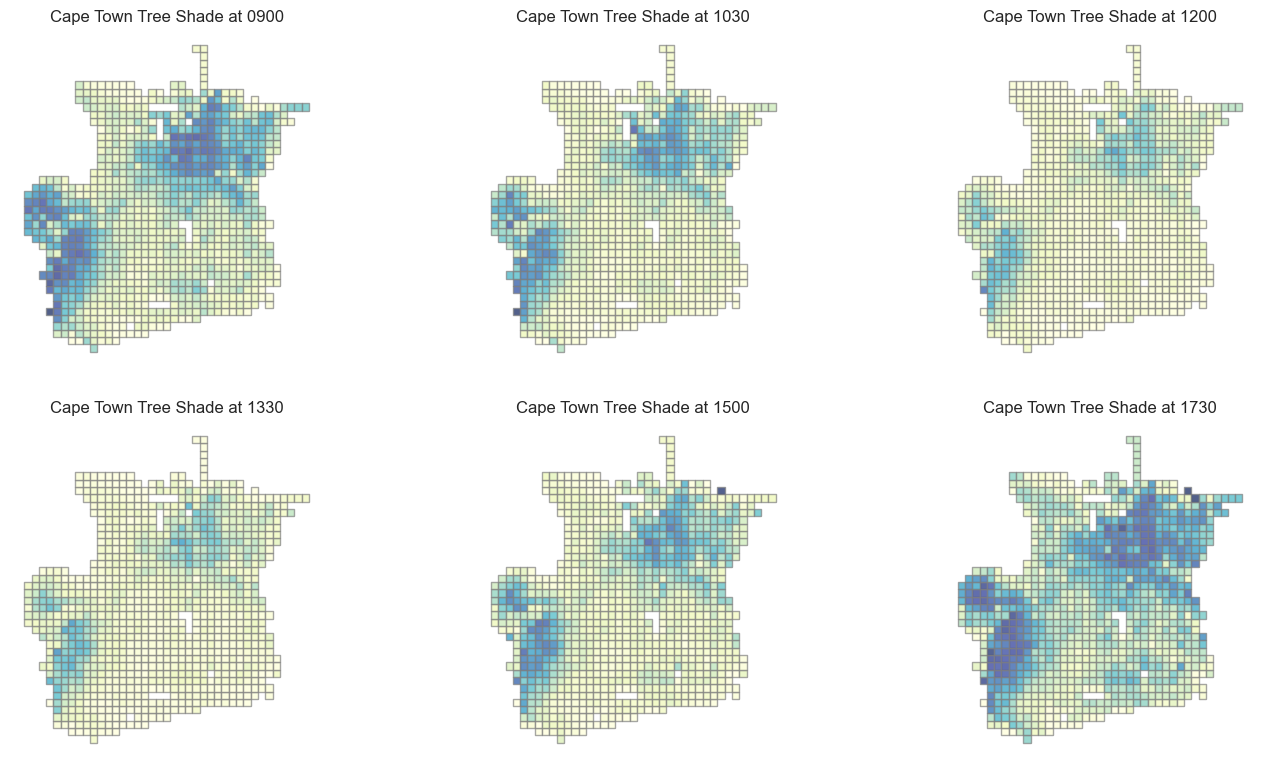

In [29]:
# Example usage:
# This will create an overview plot for Stockholm showing 6 timesteps arranged in 2 rows and 3 columns.
# You can change the time_steps list as needed.
time_steps = ["0900", "1030", "1200", "1330", "1500", "1730"]
plot_overview_shade_patterns(city="Cape Town", shade_type="tree", time_steps=time_steps, cell_size=1000, add_basemap=False)

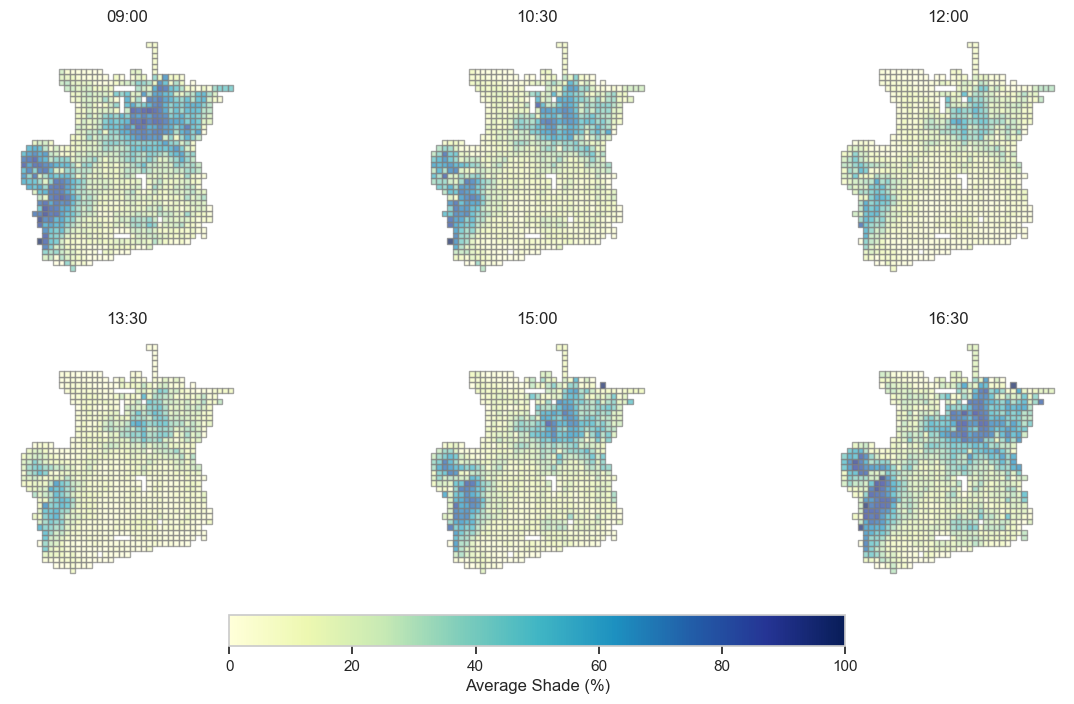

In [26]:
import math
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import contextily as ctx
import matplotlib.cm as cm
import matplotlib.colors as colors

def create_grid(gdf, cell_size):
    """
    Create a grid (as a GeoDataFrame) covering the extent of gdf,
    with square cells of size cell_size (in the units of gdf's CRS).
    """
    xmin, ymin, xmax, ymax = gdf.total_bounds
    cols = int(np.ceil((xmax - xmin) / cell_size))
    rows = int(np.ceil((ymax - ymin) / cell_size))
    
    grid_cells = []
    for i in range(cols):
        for j in range(rows):
            cell = box(
                xmin + i * cell_size, 
                ymin + j * cell_size, 
                xmin + (i + 1) * cell_size, 
                ymin + (j + 1) * cell_size
            )
            grid_cells.append(cell)
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)
    return grid

def aggregate_shade_grid(gdf, shade_column, cell_size):
    """
    Aggregate the shade values from the given GeoDataFrame onto a grid.
    
    Parameters:
    - gdf: The GeoDataFrame with sidewalk polygons.
    - shade_column: The column name (string) containing the shade percentage.
    - cell_size: The grid cell size (in the units of the gdf's CRS).
    
    Returns:
    - grid: A GeoDataFrame containing the grid cells with an added column 'avg_shade'.
    """
    gdf_copy = gdf.copy()
    gdf_copy["shade_value"] = gdf_copy[shade_column]
    
    # Ensure data is in a projected CRS so that cell_size is meaningful.
    if gdf_copy.crs.is_geographic:
        gdf_copy = gdf_copy.to_crs(epsg=3857)
    
    grid = create_grid(gdf_copy, cell_size)
    joined = gpd.sjoin(gdf_copy, grid, how="inner", predicate="intersects")
    grid_avg = joined.groupby("index_right")["shade_value"].mean()
    grid["avg_shade"] = grid.index.map(grid_avg)
    return grid

def plot_overview_shade_patterns(city, shade_type, time_steps, cell_size, add_basemap=True):
    """
    Create an overview plot showing aggregated shade maps for a given city over multiple timesteps.
    
    Parameters:
    - city: Name of the city (must be a key in combined_city_data and city_details).
    - shade_type: Either "building" or "tree" (determines which shade column to use).
    - time_steps: List of time strings in HHMM format (e.g., ["0900", "1200", "1500", "1800", "2100", "0000"]).
    - cell_size: The grid cell size (in the units of the city's projected CRS).
    - add_basemap: Boolean flag; if True, adds a Contextily basemap to each subplot.
    
    The function arranges the maps in 2 rows and automatically formats the timestamp titles.
    A single horizontal colorbar is added at the bottom.
    """
    # Validate city existence and get its data.
    if city not in combined_city_data:
        raise ValueError(f"City '{city}' not found in combined_city_data.")
    city_gdf = combined_city_data[city]
    if city not in city_details:
        raise ValueError(f"City '{city}' not found in city_details.")
    date_str = city_details[city]["date"].replace("-", "")  # e.g., "20251221"
    
    n_time = len(time_steps)
    nrows = 2
    ncols = math.ceil(n_time / nrows)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 8))
    axes = axes.flatten()
    
    for i, time_str in enumerate(time_steps):
        # Format the time (e.g., "0900" -> "09:00")
        formatted_time = f"{time_str[:2]}:{time_str[2:]}"
        
        # Construct the shade column name.
        shade_column = f"{date_str}_{shade_type}_shade_percent_at_{time_str}"
        if shade_column not in city_gdf.columns:
            raise ValueError(f"Column '{shade_column}' not found in {city} data.")
        
        # Aggregate the shade data.
        grid = aggregate_shade_grid(city_gdf, shade_column, cell_size)
        ax = axes[i]
        grid.plot(
            column="avg_shade", cmap="YlGnBu", legend=False, ax=ax,
            edgecolor="grey", vmin=0, vmax=100, alpha=0.7
        )
        ax.set_title(formatted_time)
        ax.set_axis_off()
        if add_basemap:
            ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter, crs=grid.crs)
    
    # Turn off any unused axes.
    for j in range(n_time, len(axes)):
        axes[j].axis("off")
    
    # Create a ScalarMappable for the common colorbar.
    norm = colors.Normalize(vmin=0, vmax=100)
    sm = cm.ScalarMappable(cmap="YlGnBu", norm=norm)
    sm._A = []  # dummy array for the scalar mappable
    cbar = fig.colorbar(sm, ax=axes, orientation="horizontal", fraction=0.05, pad=0.05)
    cbar.set_label("Average Shade (%)")
    
    # plt.tight_layout()
    plt.show()

# Example usage:
# This will create an overview plot for Stockholm showing 6 timesteps arranged in 2 rows and 3 columns.
# You can change the time_steps list as needed.
time_steps = ["0900", "1030", "1200", "1330", "1500", "1630"]
plot_overview_shade_patterns(city="Cape Town", shade_type="tree", time_steps=time_steps, cell_size=1000, add_basemap=False)

### Figure Archive:

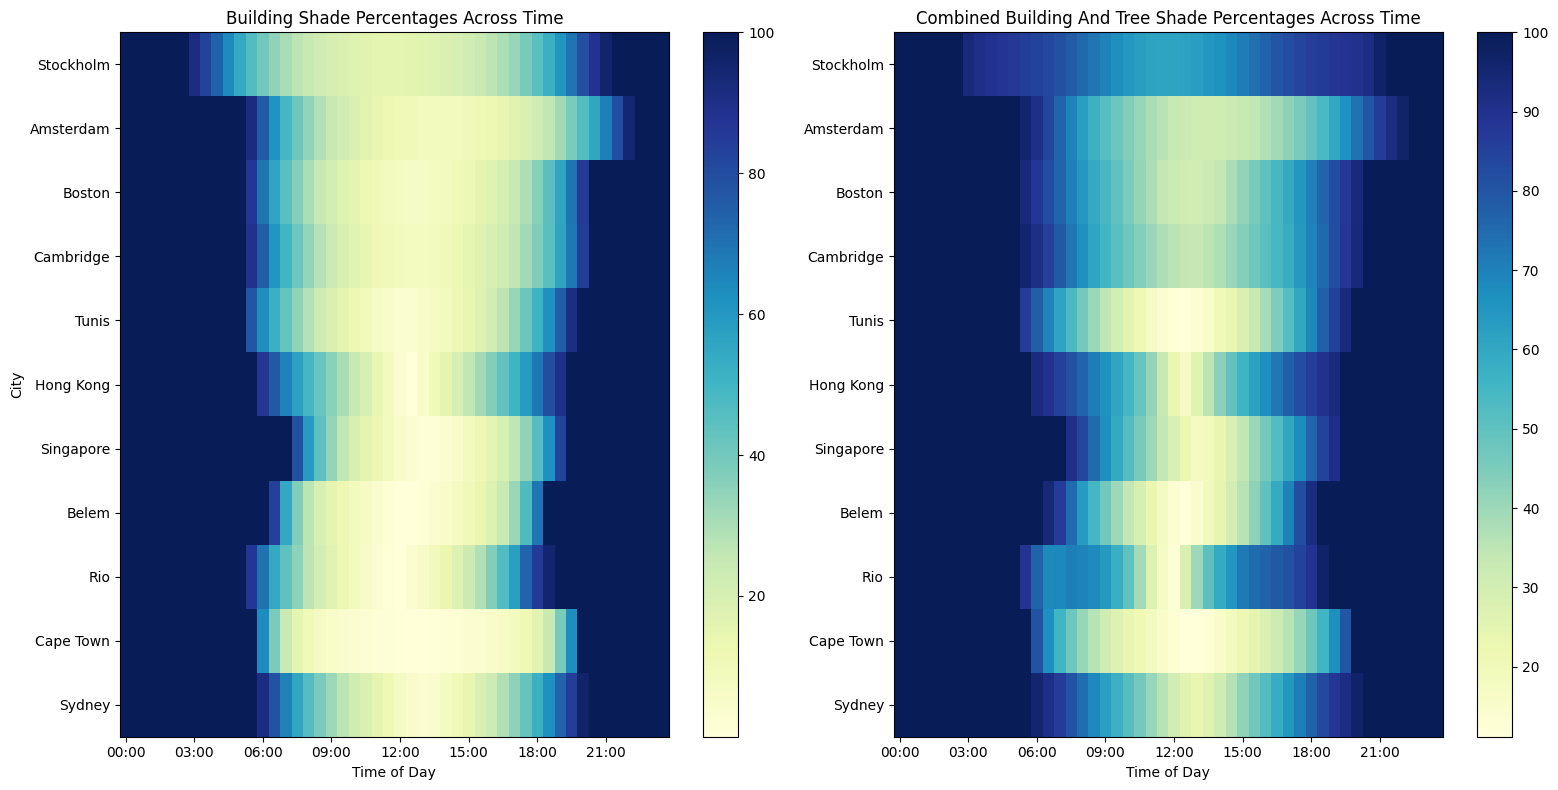

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Building shade heatmap
im1 = axes[0].imshow(building_shade_df, aspect='auto', cmap='YlGnBu', interpolation='nearest')
axes[0].set_title("Building Shade Percentages Across Time")
axes[0].set_yticks(range(len(city_details)))
axes[0].set_yticklabels(building_shade_df.index)
axes[0].set_xticks(range(0, len(all_hours), 6))
axes[0].set_xticklabels(building_shade_df.columns[::6])
axes[0].set_xlabel("Time of Day")
axes[0].set_ylabel("City")
fig.colorbar(im1, ax=axes[0], orientation='vertical')

# Tree shade heatmap
im2 = axes[1].imshow(tree_shade_df, aspect='auto', cmap='YlGnBu', interpolation='nearest')
axes[1].set_title("Combined Building And Tree Shade Percentages Across Time")
axes[1].set_yticks(range(len(city_details)))
axes[1].set_yticklabels(tree_shade_df.index)
axes[1].set_xticks(range(0, len(all_hours), 6))
axes[1].set_xticklabels(tree_shade_df.columns[::6])
axes[1].set_xlabel("Time of Day")
fig.colorbar(im2, ax=axes[1], orientation='vertical')

plt.tight_layout()
plt.show()

/tmp/ipykernel_2485012/1070947699.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")  # Choose a colormap


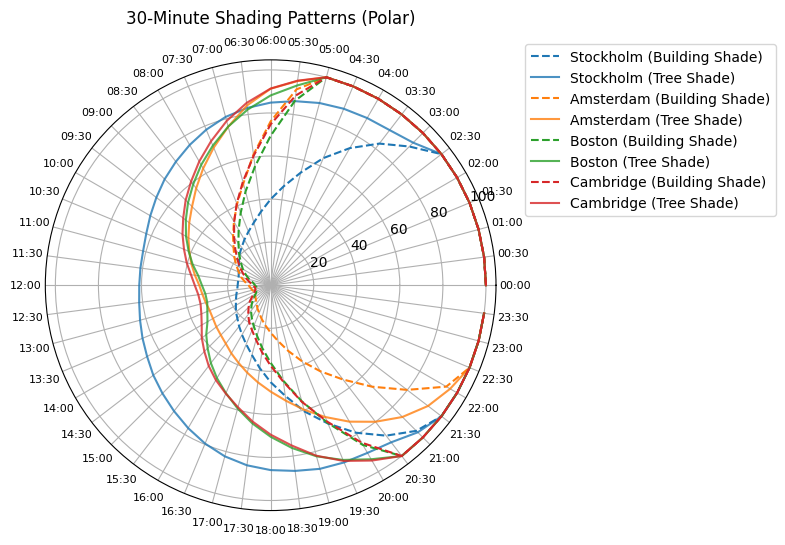

In [ ]:
from matplotlib.projections.polar import PolarAxes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Define hours in 30-minute intervals for the polar plot
theta = np.linspace(0, 2 * np.pi, len(building_shade_df.columns), endpoint=False)

# Define a colormap and assign consistent colors to cities
cmap = get_cmap("tab10")  # Choose a colormap
city_colors = {city: cmap(i) for i, city in enumerate(building_shade_df.index)}

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Iterate over the first 4 cities (or fewer, depending on test_run)
for i, city in enumerate(building_shade_df.index[:4]):
    # Use consistent color for the city
    color = city_colors[city]
    
    # Plot building shade
    ax.plot(
        theta, 
        building_shade_df.loc[city], 
        label=f"{city} (Building Shade)", 
        linestyle="--", 
        color=color
    )
    # Plot tree shade
    ax.plot(
        theta, 
        tree_shade_df.loc[city], 
        label=f"{city} (Tree Shade)", 
        alpha=0.8, 
        color=color
    )

# Set theta labels to display time of day (convert column names to readable format)
time_labels = building_shade_df.columns.tolist()
ax.set_xticks(theta)
ax.set_xticklabels(time_labels, fontsize=8)

# Add title, legend, and adjust layout
ax.set_title("30-Minute Shading Patterns (Polar)", va='bottom', fontsize=12)
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1.05))
plt.tight_layout()
plt.show()